<a href="https://colab.research.google.com/github/ricardocarreras/Bootcamp_DataScience_student/blob/master/01_Building_OptimalPremiumModel_primera_parte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an Optimal Premium Model in an insurance company Problem description

We are interested in solving a CRM problem for an insurance company. The tasks to be achieved are: 

* Finding the ideal target, in this case, people who are more likely to contract the insurance.

* Obtaining the premium we should offer to each client, it means, the optimal price that should be offered to the clients.

* Calculating the difference between offering the premium randomly and optimally using the information obtained in the model.

* Creating a simple visualization tool that helps identifying which variables have a greater impact on contracting the company’s insurance. The ideal tool should compare the results of your model to the descriptive analysis.  

# Phases 

1. Working with data:  

Two databases with clients’ information are available.  

In the first one we have the information of 20.000 clients which have already been contacted; 9% of them have contracted the product.

Important data is included such as the premium offered, the number of products that they have already bought, the number of years that they have been clients of the company and the socioeconomic status (an economic and sociological measure combined with the person’s work experience and its individual’s or family’s economic and social position in relation to others, based on income, education, and occupation). 

In the second database of non-previously contacted clients, we have the same information of 10.000 clients but only 5.000 are going to be contacted due to mechanical restrictions. 

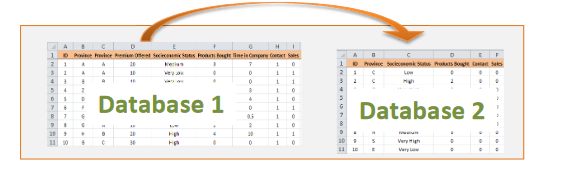

Is it worth offering the same premium to all the clients? Is it better to focus on people with some characteristics rather than choosing the clients randomly? 

2. Descriptive analysis: 

With all the data available in the first database, it is extremely important to make a complete descriptive analysis of the variables to understand the type of information we are dealing with. This can give us an idea of which variables are relevant to solve our problem.

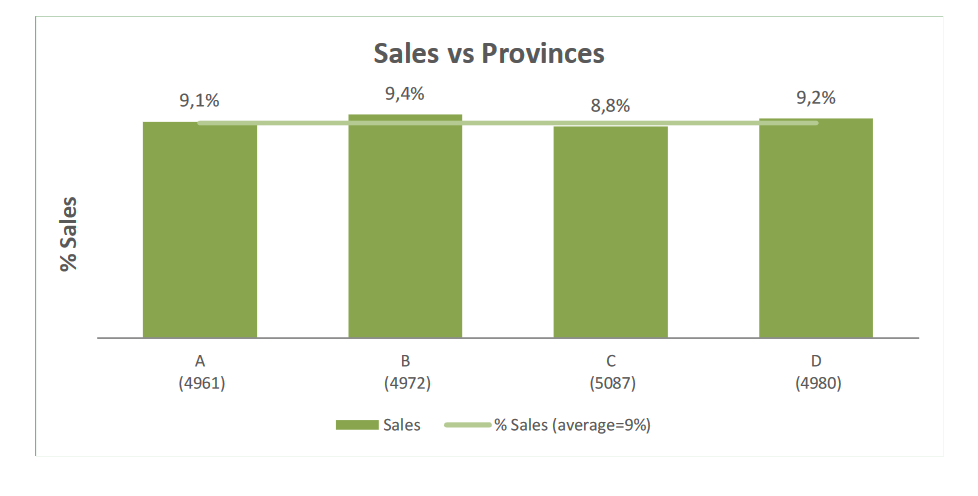


## Solving the problem:

The objective of this part is, using the first database, finding an optimal strategy to be able to contact those clients who are more likely to contract the product we are offering. This strategy should be applied
to the second database to get the ideal target. 

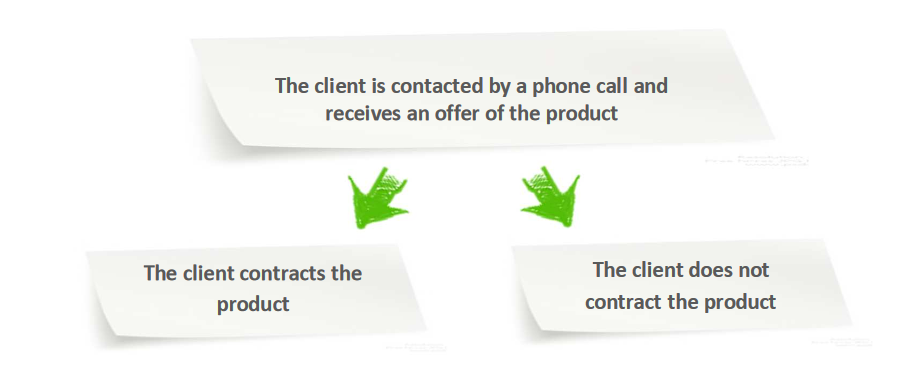

The premium is an important variable when deciding whether to contract the insurance or not: an expensive one is going to be rejected more times by the potential clients and a very cheap one is not going to maximise the earnings of the company. Therefore, once the ideal target is defined, an optimization problem should be formulated to find the optimal premium which maximises the number of contracts, and thus maximises the amount of money that the company is going to earn.

When the optimal premium is calculated, a comparison between the optimal earning and the one that we would get choosing the clients randomly can be calculated to prove the usefulness of the analysis.4.Creating a visualization tool: The tool you create should help you visualize and defend the results of your analysis. Any kind of chart can be used, but it is important that the tool helps you compare your results against the descriptive analysis. Any technology can be used, although the use of **R Shiny libraries** o **Plotly** o **Dask** would be positively valued.

In [1]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
from sklearn.impute import  KNNImputer, MissingIndicator, SimpleImputer
from sklearn.pipeline import make_pipeline, make_union
from sklearn import preprocessing

In [2]:
# Read the excel files, sheets_name are:
# 0 = index
# 1 = first database classified
# 2 = second database not classified

# Load first sheet with variables name and description
ruta_fichero = "Database.xlsx"
xls = pd.ExcelFile(ruta_fichero)
data_0 = pd.read_excel(xls, sheet_name=0 )
data_0.head(40)

,Variable Name,Meaning
0,Obs,Number of Observations
1,Sales,It indicates whether the client bought a produ...
2,Price Sensitivity,It indicates the client's sensitivity to the p...
3,PhoneType,Client's phone type: Fixed or Mobile
4,Email,It indicates whether the client's email is ava...
5,Tenure,Client's tenure (year when the person became a...
6,NumberofCampaigns,Number of times the client has been called
7,ProdActive,Number of active products
8,ProdBought,Number of different products previously bought
9,Premium Offered,Premium offered to the client


In [3]:
data_1 = pd.read_excel(xls, sheet_name=1 )
data_1.head(5)

,Obs,Sales,Price Sensitivity,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,...,Pension Plan,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House
0,1,0,NaN,FIXED / LAND PHONE,0,2012,2,0,0,11.12,...,76897.09528,two,Low,35147.05566,0.000,NaN,NaN,NaN,NaN,Urban
1,2,1,NaN,MOBILE PHONE,0,2011,2,0,1,11.12,...,18037.38088,None,Low,8133.08226,0.000,NaN,NaN,NaN,NaN,Rustic
2,3,0,NaN,FIXED / LAND PHONE,0,1992,2,0,0,14.50,...,69779.49768,two,Low,31880.39706,98010.783,3.0,2.0,1.0,0.0,Urban
3,4,0,NaN,MOBILE PHONE,0,2011,2,0,0,14.50,...,40574.30488,One,Low,18476.52126,0.000,NaN,NaN,NaN,NaN,Urban
4,5,0,NaN,MOBILE PHONE,0,1992,2,0,0,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_2 = pd.read_excel(xls, sheet_name=2 )
data_2.head(40)

,Obs,Price Sensitivity,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Birthdate,Socieconomic Status,...,Pension Plan,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House
0,1,6.0,FIXED / LAND PHONE,0,2011,4,0,0,1962.0,High,...,40289.464296,One,Low,18386.272962,56033.07732,2.0,1.0,1.0,0.0,Urban
1,2,NaN,FIXED / LAND PHONE,0,2012,2,0,0,NaN,Medium,...,13824.893096,None,Low,6240.219762,0.00000,NaN,NaN,NaN,NaN,Urban
2,3,NaN,FIXED / LAND PHONE,0,2011,6,0,1,NaN,Low,...,74436.255496,two,Low,34058.121162,66860.13132,0.0,0.0,0.0,0.0,Urban
3,4,NaN,FIXED / LAND PHONE,0,2012,2,0,0,1976.0,Low,...,66466.846696,two,Low,30400.519362,428621.27832,0.0,1.0,0.0,0.0,Urban
4,5,NaN,MOBILE PHONE,0,2013,2,0,0,1949.0,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,MOBILE PHONE,1,2011,6,0,1,1972.0,Medium,...,32249.357096,None,Low,14696.223762,0.00000,NaN,NaN,NaN,NaN,Urban
6,7,NaN,FIXED / LAND PHONE,0,2012,2,0,0,1964.0,Low,...,111937.870696,two,Medium,51269.683362,0.00000,3.0,0.0,1.0,0.0,Urban
7,8,NaN,FIXED / LAND PHONE,0,2012,2,0,0,NaN,Low,...,15454.440296,None,Low,6988.108962,0.00000,NaN,NaN,NaN,NaN,Rustic
8,9,NaN,FIXED / LAND PHONE,0,1998,26,0,3,NaN,Medium,...,20437.310696,None,Low,9275.023362,0.00000,NaN,NaN,NaN,NaN,Urban
9,10,6.0,MOBILE PHONE,0,2013,2,0,0,1971.0,High,...,15675.808296,None,Low,7089.706962,0.00000,NaN,NaN,NaN,NaN,Urban


In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Obs                              20000 non-null  int64  
 1   Sales                            20000 non-null  int64  
 2   Price Sensitivity                1475 non-null   float64
 3   PhoneType                        20000 non-null  object 
 4   Email                            20000 non-null  int64  
 5   Tenure                           20000 non-null  int64  
 6   NumberofCampaigns                20000 non-null  int64  
 7   ProdActive                       20000 non-null  int64  
 8   ProdBought                       20000 non-null  int64  
 9   Premium Offered                  20000 non-null  float64
 10  Phone Call Day                   20000 non-null  object 
 11  CodeCategory                     20000 non-null  object 
 12  Birthdate         

In [6]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Obs                              10000 non-null  int64  
 1   Price Sensitivity                2694 non-null   float64
 2   PhoneType                        10000 non-null  object 
 3   Email                            10000 non-null  int64  
 4   Tenure                           10000 non-null  int64  
 5   NumberofCampaigns                10000 non-null  int64  
 6   ProdActive                       10000 non-null  int64  
 7   ProdBought                       10000 non-null  int64  
 8   Birthdate                        4541 non-null   float64
 9   Socieconomic Status              9355 non-null   object 
 10  Province                         9283 non-null   object 
 11  Right Address                    9354 non-null   object 
 12  Living Area (m^2)  

In [7]:
# Para verificar las columnas que no estén informadas en la base_datos_2
columns1, columns2 = data_1.columns, data_2.columns
columns1, columns2

(Index(['Obs', 'Sales', 'Price Sensitivity', 'PhoneType', 'Email', 'Tenure',
        'NumberofCampaigns', 'ProdActive', 'ProdBought', 'Premium Offered',
        'Phone Call Day', 'CodeCategory', 'Birthdate', 'Product Type',
        'Number of Semesters Paid', 'Socieconomic Status', 'Province',
        'Right Address', 'Living Area (m^2)', 'House Price', 'Income',
        'yearBuilt', 'House Insurance', 'Pension Plan',
        'Estimated number of cars', 'Probability of Second Residence', 'Credit',
        'Savings', 'Number of Mobile Phones', 'Number of Fixed Lines', 'ADSL',
        '3G Devices', 'Type of House'],
       dtype='object'),
 Index(['Obs', 'Price Sensitivity', 'PhoneType', 'Email', 'Tenure',
        'NumberofCampaigns', 'ProdActive', 'ProdBought', 'Birthdate',
        'Socieconomic Status', 'Province', 'Right Address', 'Living Area (m^2)',
        'House Price', 'Income', 'yearBuilt', 'House Insurance', 'Pension Plan',
        'Estimated number of cars', 'Probability of Se

In [8]:
# Creamos una intersección de columnas para referenciarlas
cols = columns1.intersection(columns2)
cols

Index(['Obs', 'Price Sensitivity', 'PhoneType', 'Email', 'Tenure',
       'NumberofCampaigns', 'ProdActive', 'ProdBought', 'Birthdate',
       'Socieconomic Status', 'Province', 'Right Address', 'Living Area (m^2)',
       'House Price', 'Income', 'yearBuilt', 'House Insurance', 'Pension Plan',
       'Estimated number of cars', 'Probability of Second Residence', 'Credit',
       'Savings', 'Number of Mobile Phones', 'Number of Fixed Lines', 'ADSL',
       '3G Devices', 'Type of House'],
      dtype='object')

In [9]:
cols_diff = columns1.difference(columns2)
cols_diff

Index(['CodeCategory', 'Number of Semesters Paid', 'Phone Call Day',
       'Premium Offered', 'Product Type', 'Sales'],
      dtype='object')

***
## EDA

### Tratamiento de los datos categóricos

In [10]:
numeric_features = data_1.select_dtypes(include=[np.number])
numeric_features.dtypes

Obs                           int64
Sales                         int64
Price Sensitivity           float64
Email                         int64
Tenure                        int64
NumberofCampaigns             int64
ProdActive                    int64
ProdBought                    int64
Premium Offered             float64
Birthdate                   float64
Number of Semesters Paid    float64
Living Area (m^2)           float64
House Price                 float64
Income                      float64
yearBuilt                   float64
House Insurance             float64
Pension Plan                float64
Credit                      float64
Savings                     float64
Number of Mobile Phones     float64
Number of Fixed Lines       float64
ADSL                        float64
3G Devices                  float64
dtype: object

In [11]:
cat_features = data_1.select_dtypes(exclude=[np.number])
cat_features.dtypes

PhoneType                          object
Phone Call Day                     object
CodeCategory                       object
Product Type                       object
Socieconomic Status                object
Province                           object
Right Address                      object
Estimated number of cars           object
Probability of Second Residence    object
Type of House                      object
dtype: object

In [12]:
data_1.dtypes

Obs                                  int64
Sales                                int64
Price Sensitivity                  float64
PhoneType                           object
Email                                int64
Tenure                               int64
NumberofCampaigns                    int64
ProdActive                           int64
ProdBought                           int64
Premium Offered                    float64
Phone Call Day                      object
CodeCategory                        object
Birthdate                          float64
Product Type                        object
Number of Semesters Paid           float64
Socieconomic Status                 object
Province                            object
Right Address                       object
Living Area (m^2)                  float64
House Price                        float64
Income                             float64
yearBuilt                          float64
House Insurance                    float64
Pension Pla

In [13]:
 data_1['Province'].describe()

count     17848
unique       34
top          BA
freq       3827
Name: Province, dtype: object

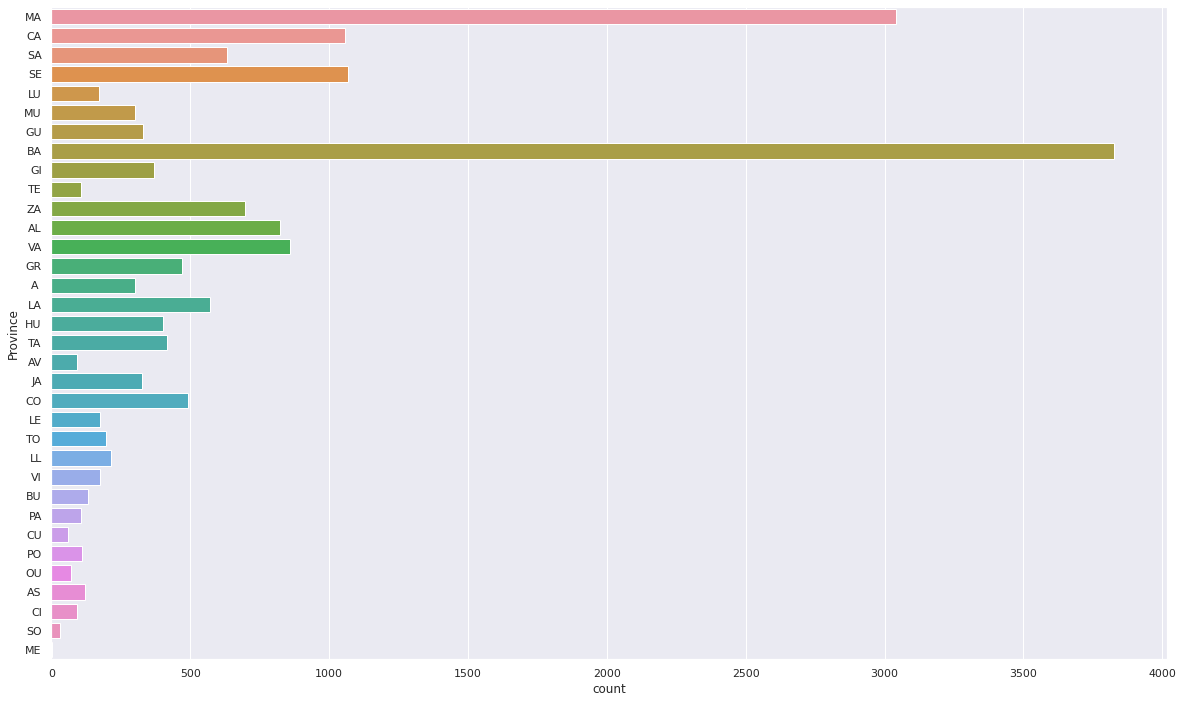

In [14]:
sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(20,12))
sns.countplot(y='Province', data=data_1)

In [15]:
# Buscamos los valores nulos, ceros, etc etc
# Otra opción es ver los diferentes estados de valor nulo
# Create a function to detect and shows missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [16]:
missing_zero_values_table(cat_features)

Your selected dataframe has 10 columns and 20000 Rows.
There are 6 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Type of House,0,5155,25.8,5155,25.8,object
Estimated number of cars,0,5140,25.7,5140,25.7,object
Probability of Second Residence,0,5140,25.7,5140,25.7,object
Province,0,2152,10.8,2152,10.8,object
Socieconomic Status,0,1984,9.9,1984,9.9,object
Right Address,0,1984,9.9,1984,9.9,object


In [17]:
missing_zero_values_table(numeric_features)

Your selected dataframe has 23 columns and 20000 Rows.
There are 15 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,18525,92.6,18525,92.6,float64
Number of Semesters Paid,634,18285,91.4,18919,94.6,float64
Number of Mobile Phones,1797,12836,64.2,14633,73.2,float64
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
Birthdate,0,10488,52.4,10488,52.4,float64
Savings,7681,5155,25.8,12836,64.2,float64
House Price,0,5140,25.7,5140,25.7,float64
Income,0,5140,25.7,5140,25.7,float64


***
### Imputación de valores nulos

cuando tengamos más datos, podemos excluir los valores nulos y así evitar
distorsión al dataset.
Sin embargo, podemos realizar una comparativa probando
a imputar estos valores.

In [18]:
# En caso de imputar por valor por defecto - con inplace=True
data_1['Number of Semesters Paid'].fillna("NA", inplace=False)

0         NA
1        4.5
2         NA
3         NA
4         NA
        ... 
19995     NA
19996     NA
19997     NA
19998     NA
19999     NA
Name: Number of Semesters Paid, Length: 20000, dtype: object

In [19]:
# Otra alternativa es asignar valores
data_1['Number of Semesters Paid'] = data_1['Number of Semesters Paid'].map(
    {0.0: "Zero",
     1.5: "OneFive",
     3.0:"Three",
     4.5:"FourFive",
     "NA":"Not Available"}
).astype('category')

In [20]:
data_1['Number of Semesters Paid'].head(10)

0         NaN
1    FourFive
2         NaN
3         NaN
4         NaN
5       Three
6         NaN
7         NaN
8         NaN
9         NaN
Name: Number of Semesters Paid, dtype: category
Categories (4, object): ['FourFive', 'OneFive', 'Three', 'Zero']

In [21]:
data_1['Number of Semesters Paid'].value_counts()

Zero        634
FourFive    563
Three       425
OneFive      93
Name: Number of Semesters Paid, dtype: int64

In [22]:
# Imputar categorícas
from sklearn_pandas import CategoricalImputer
data = data_1['Socieconomic Status']
imputer = CategoricalImputer()
data_1['Socieconomic Status'] = imputer.fit_transform(data_1['Socieconomic Status'])

In [23]:
data_1['Socieconomic Status'].describe()

count      20000
unique         4
top       Medium
freq       12946
Name: Socieconomic Status, dtype: object

In [24]:
data_1['Socieconomic Status']

0           Medium
1           Medium
2           Medium
3           Medium
4           Medium
           ...    
19995          Low
19996          Low
19997          Low
19998          Low
19999    Very High
Name: Socieconomic Status, Length: 20000, dtype: object

In [25]:
data_1['Province'].value_counts()

BA    3827
MA    3040
SE    1069
CA    1056
VA     859
AL     825
ZA     698
SA     632
LA     571
CO     493
GR     472
TA     417
HU     403
GI     370
GU     331
JA     325
A      300
MU     300
LL     214
TO     197
VI     177
LE     175
LU     170
BU     131
AS     123
PO     109
TE     108
PA     106
CI      93
AV      91
OU      71
CU      61
SO      32
ME       2
Name: Province, dtype: int64

In [26]:
data_1['Province'].value_counts()/len(data_1)*100

BA    19.135
MA    15.200
SE     5.345
CA     5.280
VA     4.295
AL     4.125
ZA     3.490
SA     3.160
LA     2.855
CO     2.465
GR     2.360
TA     2.085
HU     2.015
GI     1.850
GU     1.655
JA     1.625
A      1.500
MU     1.500
LL     1.070
TO     0.985
VI     0.885
LE     0.875
LU     0.850
BU     0.655
AS     0.615
PO     0.545
TE     0.540
PA     0.530
CI     0.465
AV     0.455
OU     0.355
CU     0.305
SO     0.160
ME     0.010
Name: Province, dtype: float64

In [27]:
# Imputación por proporción según los valores de forma randomizada
s = data_1['Province'].value_counts(normalize=True)
missing = data_1['Province'].isnull()
data_1.loc[missing, 'Province'] = np.random.choice(s.index, size=len(data_1[missing]),
                                                   p=s.values)

In [28]:
data_1['Province'].value_counts()/len(data_1)*100

BA    21.420
MA    17.040
SE     5.945
CA     5.880
VA     4.785
AL     4.655
ZA     3.915
SA     3.550
LA     3.165
CO     2.750
GR     2.670
TA     2.330
HU     2.330
GI     2.075
GU     1.825
JA     1.800
MU     1.700
A      1.650
LL     1.245
TO     1.170
LE     0.985
VI     0.965
LU     0.925
BU     0.740
AS     0.685
TE     0.620
PO     0.595
PA     0.585
CI     0.545
AV     0.490
OU     0.385
CU     0.355
SO     0.215
ME     0.010
Name: Province, dtype: float64

In [29]:
data_1.Sales.nunique

<bound method IndexOpsMixin.nunique of 0        0
1        1
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: Sales, Length: 20000, dtype: int64>

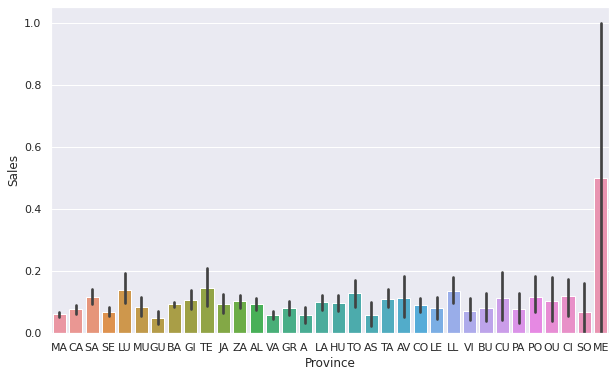

In [30]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Province", y="Sales", data=data_1)
plt.show()

In [31]:
data_1[["Province", "Sales"]].groupby(['Province'], as_index=True).mean()

,Sales
Province,
A,0.057576
AL,0.093448
AS,0.058394
AV,0.112245
BA,0.093371
BU,0.081081
CA,0.077381
CI,0.119266
CO,0.090909


In [32]:
data_1.Province.nunique()

34

In [33]:
#zona_1 = ['A','VA','BA','GI','MU','TA']
#zona_2 = ['SE','AL','GR','JA','ME','CA','CO','CI']
#zona_3 = ['MA','ZA','TO','TE','LL','HU','SE','LE','AV','SA']
#zona_4 = ['SO','BU','VA','VI','PO','OU','LU','AS','GU','PA']

In [34]:
#len(zona_1)+len(zona_2)+len(zona_3)+len(zona_4)

In [35]:
#data_1.Province.replace(zona_1, "Zona Riesgo Extrema")

In [36]:
#data_1.Province.replace(zona_2, "Zona Riesgo Alta")

In [37]:
#data_1.Province.replace(zona_3, "Zona Riesgo Media")

In [38]:
#data_1.Province.replace(zona_1, "Zona Riesgo Baja")

# Práctica

- tratar los valores nulos de las features object
- discretizar las features object
- visualización de estos resultados
- binarizar las features para el modelo


### opcional

- tratar los valores nulos de las numéricas
- discretizar las continuas o valorar si es necesario
- y opcionalmente binarizar

In [39]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import xlrd, xdrlib

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
from sklearn.impute import  KNNImputer, MissingIndicator, SimpleImputer
from sklearn_pandas import categorical_imputer, CategoricalImputer
from sklearn.pipeline import make_pipeline, make_union
from sklearn import preprocessing


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

In [40]:
dataset = [data_1, data_2]

In [41]:
data_1.head(10)

,Obs,Sales,Price Sensitivity,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,...,Pension Plan,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House
0,1,0,NaN,FIXED / LAND PHONE,0,2012,2,0,0,11.12,...,76897.09528,two,Low,35147.05566,0.000,NaN,NaN,NaN,NaN,Urban
1,2,1,NaN,MOBILE PHONE,0,2011,2,0,1,11.12,...,18037.38088,None,Low,8133.08226,0.000,NaN,NaN,NaN,NaN,Rustic
2,3,0,NaN,FIXED / LAND PHONE,0,1992,2,0,0,14.50,...,69779.49768,two,Low,31880.39706,98010.783,3.0,2.0,1.0,0.0,Urban
3,4,0,NaN,MOBILE PHONE,0,2011,2,0,0,14.50,...,40574.30488,One,Low,18476.52126,0.000,NaN,NaN,NaN,NaN,Urban
4,5,0,NaN,MOBILE PHONE,0,1992,2,0,0,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,1,NaN,MOBILE PHONE,1,2009,6,2,2,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,0,NaN,FIXED / LAND PHONE,0,2012,2,0,0,11.12,...,23349.46248,None,Low,10571.08986,0.000,NaN,NaN,NaN,NaN,Rustic
7,8,0,NaN,FIXED / LAND PHONE,0,1995,2,0,0,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,0,NaN,FIXED / LAND PHONE,0,2011,2,0,0,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,0,NaN,MOBILE PHONE,0,2009,2,0,0,14.50,...,25992.37128,None,Low,11784.06666,0.000,NaN,NaN,NaN,NaN,Urban


In [42]:
data_2.head(10)

,Obs,Price Sensitivity,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Birthdate,Socieconomic Status,...,Pension Plan,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House
0,1,6.0,FIXED / LAND PHONE,0,2011,4,0,0,1962.0,High,...,40289.464296,One,Low,18386.272962,56033.07732,2.0,1.0,1.0,0.0,Urban
1,2,NaN,FIXED / LAND PHONE,0,2012,2,0,0,NaN,Medium,...,13824.893096,None,Low,6240.219762,0.00000,NaN,NaN,NaN,NaN,Urban
2,3,NaN,FIXED / LAND PHONE,0,2011,6,0,1,NaN,Low,...,74436.255496,two,Low,34058.121162,66860.13132,0.0,0.0,0.0,0.0,Urban
3,4,NaN,FIXED / LAND PHONE,0,2012,2,0,0,1976.0,Low,...,66466.846696,two,Low,30400.519362,428621.27832,0.0,1.0,0.0,0.0,Urban
4,5,NaN,MOBILE PHONE,0,2013,2,0,0,1949.0,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,MOBILE PHONE,1,2011,6,0,1,1972.0,Medium,...,32249.357096,None,Low,14696.223762,0.00000,NaN,NaN,NaN,NaN,Urban
6,7,NaN,FIXED / LAND PHONE,0,2012,2,0,0,1964.0,Low,...,111937.870696,two,Medium,51269.683362,0.00000,3.0,0.0,1.0,0.0,Urban
7,8,NaN,FIXED / LAND PHONE,0,2012,2,0,0,NaN,Low,...,15454.440296,None,Low,6988.108962,0.00000,NaN,NaN,NaN,NaN,Rustic
8,9,NaN,FIXED / LAND PHONE,0,1998,26,0,3,NaN,Medium,...,20437.310696,None,Low,9275.023362,0.00000,NaN,NaN,NaN,NaN,Urban
9,10,6.0,MOBILE PHONE,0,2013,2,0,0,1971.0,High,...,15675.808296,None,Low,7089.706962,0.00000,NaN,NaN,NaN,NaN,Urban


In [43]:
for i in dataset:
    lista = []
    lista.append(i.isna().sum()/len(i)*100)
    print(lista)
    print("*-"*20)

[Obs                                 0.000
Sales                               0.000
Price Sensitivity                  92.625
PhoneType                           0.000
Email                               0.000
Tenure                              0.000
NumberofCampaigns                   0.000
ProdActive                          0.000
ProdBought                          0.000
Premium Offered                     0.000
Phone Call Day                      0.000
CodeCategory                        0.000
Birthdate                          52.440
Product Type                        0.000
Number of Semesters Paid           91.425
Socieconomic Status                 0.000
Province                            0.000
Right Address                       9.920
Living Area (m^2)                  25.680
House Price                        25.700
Income                             25.700
yearBuilt                          25.675
House Insurance                    25.700
Pension Plan                     

In [44]:
dataset[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Obs                              20000 non-null  int64   
 1   Sales                            20000 non-null  int64   
 2   Price Sensitivity                1475 non-null   float64 
 3   PhoneType                        20000 non-null  object  
 4   Email                            20000 non-null  int64   
 5   Tenure                           20000 non-null  int64   
 6   NumberofCampaigns                20000 non-null  int64   
 7   ProdActive                       20000 non-null  int64   
 8   ProdBought                       20000 non-null  int64   
 9   Premium Offered                  20000 non-null  float64 
 10  Phone Call Day                   20000 non-null  object  
 11  CodeCategory                     20000 non-null  object  
 12  Birt

## Data Science Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

0. Environment.
1. Check libraries version.
2. Import Libraries.
3. Question or problem definition.
4. Acquire dataset or training and testing data.
5. Analyze, identify patterns, and explore the data.

6. **Wrangle, prepare, cleanse the data.**
7. Feature Engineering
8. Model, predict and solve the problem.
9. Visualize, report, and present the problem solving steps and final solution.
10. Create or solve AI pipeline on Cloud, architecture solution and shows results.

Could be to exist another substeps during Data Processing and Data Modeling, for to train and deploy many machine learning and/or deep learning combination pipelines.

## 2a Part - Wrangle and Cleanse data - categorical features

***

## Import Libraries and modules

We create grouping for different libraries and modules per workflow block or step.

In [45]:
#!pip install sklearn_pandas
#!pip install -U scikit-learn

In [46]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import xlrd, xdrlib

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
from sklearn.impute import  KNNImputer, MissingIndicator, SimpleImputer
from sklearn_pandas import categorical_imputer, CategoricalImputer
from sklearn.pipeline import make_pipeline, make_union
from sklearn import preprocessing


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

In [47]:
import sklearn; sklearn.show_versions()


System:
    python: 3.7.13 (default, Apr 24 2022, 01:04:09)  [GCC 7.5.0]
executable: /usr/bin/python3
   machine: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
          pip: 21.1.3
   setuptools: 57.4.0
      sklearn: 1.0.2
        numpy: 1.21.6
        scipy: 1.4.1
       Cython: 0.29.30
       pandas: 1.3.5
   matplotlib: 3.2.2
       joblib: 1.1.0
threadpoolctl: 3.1.0

Built with OpenMP: True


In [48]:
import sklearn_pandas

In [49]:
sklearn_pandas.__version__

'1.8.0'

***

## Load dataset from 1_EDA part

Only if we use different way to load dataset from cloud storage, google drive or locally, we develop different chunks or API connection.

In [50]:
#data_1 = pd.read_csv("df_eda_1.csv")
#data_2 = pd.read_csv("df_eda_2.csv")
dataset = [data_1, data_2]

In [51]:
data_1.head(10)

,Obs,Sales,Price Sensitivity,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,...,Pension Plan,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House
0,1,0,NaN,FIXED / LAND PHONE,0,2012,2,0,0,11.12,...,76897.09528,two,Low,35147.05566,0.000,NaN,NaN,NaN,NaN,Urban
1,2,1,NaN,MOBILE PHONE,0,2011,2,0,1,11.12,...,18037.38088,None,Low,8133.08226,0.000,NaN,NaN,NaN,NaN,Rustic
2,3,0,NaN,FIXED / LAND PHONE,0,1992,2,0,0,14.50,...,69779.49768,two,Low,31880.39706,98010.783,3.0,2.0,1.0,0.0,Urban
3,4,0,NaN,MOBILE PHONE,0,2011,2,0,0,14.50,...,40574.30488,One,Low,18476.52126,0.000,NaN,NaN,NaN,NaN,Urban
4,5,0,NaN,MOBILE PHONE,0,1992,2,0,0,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,1,NaN,MOBILE PHONE,1,2009,6,2,2,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,0,NaN,FIXED / LAND PHONE,0,2012,2,0,0,11.12,...,23349.46248,None,Low,10571.08986,0.000,NaN,NaN,NaN,NaN,Rustic
7,8,0,NaN,FIXED / LAND PHONE,0,1995,2,0,0,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,0,NaN,FIXED / LAND PHONE,0,2011,2,0,0,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,0,NaN,MOBILE PHONE,0,2009,2,0,0,14.50,...,25992.37128,None,Low,11784.06666,0.000,NaN,NaN,NaN,NaN,Urban


In [52]:
data_2.head(10)

,Obs,Price Sensitivity,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Birthdate,Socieconomic Status,...,Pension Plan,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House
0,1,6.0,FIXED / LAND PHONE,0,2011,4,0,0,1962.0,High,...,40289.464296,One,Low,18386.272962,56033.07732,2.0,1.0,1.0,0.0,Urban
1,2,NaN,FIXED / LAND PHONE,0,2012,2,0,0,NaN,Medium,...,13824.893096,None,Low,6240.219762,0.00000,NaN,NaN,NaN,NaN,Urban
2,3,NaN,FIXED / LAND PHONE,0,2011,6,0,1,NaN,Low,...,74436.255496,two,Low,34058.121162,66860.13132,0.0,0.0,0.0,0.0,Urban
3,4,NaN,FIXED / LAND PHONE,0,2012,2,0,0,1976.0,Low,...,66466.846696,two,Low,30400.519362,428621.27832,0.0,1.0,0.0,0.0,Urban
4,5,NaN,MOBILE PHONE,0,2013,2,0,0,1949.0,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,MOBILE PHONE,1,2011,6,0,1,1972.0,Medium,...,32249.357096,None,Low,14696.223762,0.00000,NaN,NaN,NaN,NaN,Urban
6,7,NaN,FIXED / LAND PHONE,0,2012,2,0,0,1964.0,Low,...,111937.870696,two,Medium,51269.683362,0.00000,3.0,0.0,1.0,0.0,Urban
7,8,NaN,FIXED / LAND PHONE,0,2012,2,0,0,NaN,Low,...,15454.440296,None,Low,6988.108962,0.00000,NaN,NaN,NaN,NaN,Rustic
8,9,NaN,FIXED / LAND PHONE,0,1998,26,0,3,NaN,Medium,...,20437.310696,None,Low,9275.023362,0.00000,NaN,NaN,NaN,NaN,Urban
9,10,6.0,MOBILE PHONE,0,2013,2,0,0,1971.0,High,...,15675.808296,None,Low,7089.706962,0.00000,NaN,NaN,NaN,NaN,Urban


***

## 5. Cleanse, Wrangle, Prepare the data and Feature Engineering

### 5.1 Missing Values

Many real-world datasets may contain missing values for various reasons. They are often encoded as NaNs, blanks or any other placeholders. Training a model with a dataset that has a lot of missing values can drastically impact the machine learning model’s quality. Some algorithms such as scikit-learn estimators assume that all values are numerical and have and hold meaningful value.

One way to handle this problem is to get rid of the observations that have missing data. However, you will risk losing data points with valuable information. A better strategy would be to impute the missing values. In other words, we need to infer those missing values from the existing part of the data. 

we will focus on 6 popular ways for data imputation for cross-sectional datasets:

* Do Nothing
* Imputation Using (Mean/Median) Values
* Imputation Using (Most Frequent) or (Zero/Constant) Values
* Imputation Using k-NN
* Imputation Using Multivariate Imputation by Chained Equation (MICE)
* Imputation Using Deep Learning (Datawig)

We can check all of them and evaluate model combining each step described before.

#### a. Do Nothing

That’s an easy one. You just let the algorithm handle the missing data. Some algorithms can factor in the missing values and learn the best imputation values for the missing data based on the training loss reduction (ie. XGBoost). Some others have the option to just ignore them (ie. LightGBM — use_missing=false). However, other algorithms will panic and throw an error complaining about the missing values (ie. Scikit learn — LinearRegression). In that case, you will need to handle the missing data and clean it before feeding it to the algorithm.

#### b. Imputation Using (Mean/Median) Values:

This works by calculating the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others. It can only be used with numeric data.

*Pros*:
Easy and fast.
Works well with small numerical datasets.

*Cons*:
Doesn’t factor the correlations between features. It only works on the column level.
Will give poor results on encoded categorical features (do NOT use it on categorical features).
Not very accurate.
Doesn’t account for the uncertainty in the imputations

#### c. Imputation Using (Most Frequent) or (Zero/Constant) Values

Most Frequent is another statistical strategy to impute missing values and YES!! It works with categorical features (strings or numerical representations) by replacing missing data with the most frequent values within each column.

*Pros*:
Works well with categorical features.

*Cons*:
It also doesn’t factor the correlations between features.
It can introduce bias in the data.

#### d. Imputation Using k-NN:

The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. This can be very useful in making predictions about the missing values by finding the k’s closest neighbours to the observation with missing data and then imputing them based on the non-missing values in the neighbourhood. Let’s see some example code using Impyute library which provides a simple and easy way to use KNN for imputation:

*Pros*:
Can be much more accurate than the mean, median or most frequent imputation methods (It depends on the dataset).

*Cons*:
Computationally expensive. KNN works by storing the whole training dataset in memory.
K-NN is quite sensitive to outliers in the data (unlike SVM)

#### e. Imputation Using Multivariate Imputation by Chained Equation (MICE)

This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns. For more information on the algorithm mechanics, you can refer to the Research Paper

#### f. Imputation Using Deep Learning (Datawig):

This method works very well with categorical and non-numerical features. It is a library that learns Machine Learning models using Deep Neural Networks to impute missing values in a dataframe. It also supports both CPU and GPU for training.

*Pros*:
Quite accurate compared to other methods.
It has some functions that can handle categorical data (Feature Encoder).
It supports CPUs and GPUs.

*Cons*:
Single Column imputation.
Can be quite slow with large datasets.
You have to specify the columns that contain information about the target column that will be imputed.


#### Other Imputation Methods:

##### Stochastic regression imputation:
It is quite similar to regression imputation which tries to predict the missing values by regressing it from other related variables in the same dataset plus some random residual value.

##### Extrapolation and Interpolation:
It tries to estimate values from other observations within the range of a discrete set of known data points.

##### Hot-Deck imputation:
Works by randomly choosing the missing value from a set of related and similar variables.


***

## Missing values and Imputation - stage 1

All variables with more >70% of missing values are dropped. We impute the others. Maybe is worst approach to impute missing values, so, we divide this task in two parts:
- remove missing values
- impute missing values

In [53]:
# Check null and NA values for both dataset by frequency first and absolute values after

for i in dataset:
    lista = []
    lista.append(i.isna().sum()/len(i)*100)
    print(lista)
    print("*-"*20)

[Obs                                 0.000
Sales                               0.000
Price Sensitivity                  92.625
PhoneType                           0.000
Email                               0.000
Tenure                              0.000
NumberofCampaigns                   0.000
ProdActive                          0.000
ProdBought                          0.000
Premium Offered                     0.000
Phone Call Day                      0.000
CodeCategory                        0.000
Birthdate                          52.440
Product Type                        0.000
Number of Semesters Paid           91.425
Socieconomic Status                 0.000
Province                            0.000
Right Address                       9.920
Living Area (m^2)                  25.680
House Price                        25.700
Income                             25.700
yearBuilt                          25.675
House Insurance                    25.700
Pension Plan                     

### Check data type for missing variables

In [54]:
dataset[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Obs                              20000 non-null  int64   
 1   Sales                            20000 non-null  int64   
 2   Price Sensitivity                1475 non-null   float64 
 3   PhoneType                        20000 non-null  object  
 4   Email                            20000 non-null  int64   
 5   Tenure                           20000 non-null  int64   
 6   NumberofCampaigns                20000 non-null  int64   
 7   ProdActive                       20000 non-null  int64   
 8   ProdBought                       20000 non-null  int64   
 9   Premium Offered                  20000 non-null  float64 
 10  Phone Call Day                   20000 non-null  object  
 11  CodeCategory                     20000 non-null  object  
 12  Birt

In [55]:
# using dropna() function     
dataset[0].dropna(how = 'all') 

,Obs,Sales,Price Sensitivity,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,...,Pension Plan,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House
0,1,0,NaN,FIXED / LAND PHONE,0,2012,2,0,0,11.12,...,76897.09528,two,Low,35147.05566,0.000,NaN,NaN,NaN,NaN,Urban
1,2,1,NaN,MOBILE PHONE,0,2011,2,0,1,11.12,...,18037.38088,None,Low,8133.08226,0.000,NaN,NaN,NaN,NaN,Rustic
2,3,0,NaN,FIXED / LAND PHONE,0,1992,2,0,0,14.50,...,69779.49768,two,Low,31880.39706,98010.783,3.0,2.0,1.0,0.0,Urban
3,4,0,NaN,MOBILE PHONE,0,2011,2,0,0,14.50,...,40574.30488,One,Low,18476.52126,0.000,NaN,NaN,NaN,NaN,Urban
4,5,0,NaN,MOBILE PHONE,0,1992,2,0,0,14.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,NaN,FIXED / LAND PHONE,0,2013,2,0,0,14.50,...,31736.20088,None,Low,14420.22726,44352.684,1.0,2.0,0.0,0.0,Rustic
19996,19997,0,NaN,FIXED / LAND PHONE,0,2013,2,0,0,14.50,...,21709.78488,None,Low,9818.55126,0.000,NaN,NaN,NaN,NaN,Urban
19997,19998,0,NaN,FIXED / LAND PHONE,0,2009,4,0,1,14.50,...,33171.76968,None,Low,15079.08906,46377.495,3.0,0.0,1.0,1.0,Urban
19998,19999,0,NaN,FIXED / LAND PHONE,0,2012,4,0,0,14.50,...,67326.33288,two,Low,30754.50426,94550.706,1.0,1.0,1.0,0.0,Urban


> Dataset[0] hasn't null values per row!

In [56]:
# using dropna() function     
dataset[1].dropna(how = 'all')

,Obs,Price Sensitivity,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Birthdate,Socieconomic Status,...,Pension Plan,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House
0,1,6.0,FIXED / LAND PHONE,0,2011,4,0,0,1962.0,High,...,40289.464296,One,Low,18386.272962,56033.07732,2.0,1.0,1.0,0.0,Urban
1,2,NaN,FIXED / LAND PHONE,0,2012,2,0,0,NaN,Medium,...,13824.893096,None,Low,6240.219762,0.00000,NaN,NaN,NaN,NaN,Urban
2,3,NaN,FIXED / LAND PHONE,0,2011,6,0,1,NaN,Low,...,74436.255496,two,Low,34058.121162,66860.13132,0.0,0.0,0.0,0.0,Urban
3,4,NaN,FIXED / LAND PHONE,0,2012,2,0,0,1976.0,Low,...,66466.846696,two,Low,30400.519362,428621.27832,0.0,1.0,0.0,0.0,Urban
4,5,NaN,MOBILE PHONE,0,2013,2,0,0,1949.0,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,NaN,MOBILE PHONE,0,2012,2,0,0,1947.0,Medium,...,33368.793096,None,Low,15209.994762,46271.82132,1.0,1.0,1.0,0.0,Urban
9996,9997,NaN,FIXED / LAND PHONE,0,2012,4,0,0,NaN,Low,...,22729.300296,None,Low,10326.943962,0.00000,NaN,NaN,NaN,NaN,Rustic
9997,9998,NaN,MOBILE PHONE,0,2012,2,0,0,NaN,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9999,NaN,MOBILE PHONE,0,2012,2,0,0,NaN,Low,...,14379.438696,None,Low,6494.731362,51849.99432,NaN,NaN,NaN,NaN,Urban


> Either Dataset[1] hasn't null values per row!

### Drop variables > 70% missing values

In this first part we drop variable with more 70% missing values

In [57]:
# Create a function to detect and shows missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [58]:
# Check first dataset
missing_zero_values_table(dataset[0])

Your selected dataframe has 33 columns and 20000 Rows.
There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,18525,92.6,18525,92.6,float64
Number of Semesters Paid,0,18285,91.4,18285,91.4,category
3G Devices,3555,12836,64.2,16391,82.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
Number of Mobile Phones,1797,12836,64.2,14633,73.2,float64
Birthdate,0,10488,52.4,10488,52.4,float64
Savings,7681,5155,25.8,12836,64.2,float64
Type of House,0,5155,25.8,5155,25.8,object
House Insurance,0,5140,25.7,5140,25.7,float64


In [59]:
# Check second dataset
missing_zero_values_table(dataset[1])

Your selected dataframe has 27 columns and 10000 Rows.
There are 20 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,7306,73.1,7306,73.1,float64
3G Devices,1883,6240,62.4,8123,81.2,float64
ADSL,1845,6240,62.4,8085,80.8,float64
Number of Fixed Lines,1258,6240,62.4,7498,75.0,float64
Number of Mobile Phones,914,6240,62.4,7154,71.5,float64
Birthdate,0,5459,54.6,5459,54.6,float64
Estimated number of cars,0,2170,21.7,2170,21.7,object
House Price,0,2170,21.7,2170,21.7,float64
Probability of Second Residence,0,2170,21.7,2170,21.7,object
Savings,4071,2169,21.7,6240,62.4,float64


In [60]:
# Number of Semesters Paid are only for customer that bought the product, and are 1715. 
dataset[0]['Number of Semesters Paid'].value_counts().sum()

1715

In [61]:
# Total of semesters paid only for customers that bought the product
dataset[0]['Number of Semesters Paid'].value_counts(dropna=False)

NaN         18285
Zero          634
FourFive      563
Three         425
OneFive        93
Name: Number of Semesters Paid, dtype: int64

In [62]:
# We can transform that variables in categorical and impute missing values as NC = Not Client
dataset[0]['Number of Semesters Paid'] = dataset[0]['Number of Semesters Paid'].cat.add_categories('NC')
dataset[0]['Number of Semesters Paid'].value_counts(dropna=False)



NaN         18285
Zero          634
FourFive      563
Three         425
OneFive        93
NC              0
Name: Number of Semesters Paid, dtype: int64

In [63]:
# Impute na values with NotClient value
dataset[0]['Number of Semesters Paid'].fillna("NC", inplace=True)

In [64]:
dataset[0]['Number of Semesters Paid'].value_counts(dropna=False)

NC          18285
Zero          634
FourFive      563
Three         425
OneFive        93
Name: Number of Semesters Paid, dtype: int64

In [65]:
# Total of semesters paid only for customers that bought the product
dataset[0]['Number of Semesters Paid'].value_counts()

NC          18285
Zero          634
FourFive      563
Three         425
OneFive        93
Name: Number of Semesters Paid, dtype: int64

In [66]:
# We can transform that variables in categorical and impute missing values as NC = Not Client
#dataset[0]['Number of Semesters Paid'] = dataset[0]['Number of Semesters Paid'].cat.add_categories('NC')
#dataset[0]['Number of Semesters Paid'] = dataset[0]['Number of Semesters Paid'].fillna("NC", inplace=True)

In [67]:
dataset[0]['Number of Semesters Paid'] = dataset[0]['Number of Semesters Paid'].map( {0.0: "Zero",
                                             1.5: "OneFive",
                                            3.0: "Three",
                                            4.5:"FourFive",
                                            "NC":"NotClient"} ).astype('category')

In [68]:
dataset[0]['Number of Semesters Paid']

0        NotClient
1              NaN
2        NotClient
3        NotClient
4        NotClient
           ...    
19995    NotClient
19996    NotClient
19997    NotClient
19998    NotClient
19999    NotClient
Name: Number of Semesters Paid, Length: 20000, dtype: category
Categories (1, object): ['NotClient']

In [117]:
# Total of semesters paid only for customers that bought the product
dataset[0]['Number of Semesters Paid'].value_counts()

NotClient    18285
Name: Number of Semesters Paid, dtype: int64

In [118]:
dataset[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Obs                              20000 non-null  int64   
 1   Sales                            20000 non-null  int64   
 2   PhoneType                        20000 non-null  object  
 3   Email                            20000 non-null  int64   
 4   Tenure                           20000 non-null  int64   
 5   NumberofCampaigns                20000 non-null  int64   
 6   ProdActive                       20000 non-null  int64   
 7   ProdBought                       20000 non-null  int64   
 8   Premium Offered                  20000 non-null  float64 
 9   Phone Call Day                   20000 non-null  object  
 10  CodeCategory                     20000 non-null  object  
 11  Birthdate                        9512 non-null   float64 
 12  Prod

In [119]:
# Keep only variables with null values first dataset
miss_df1 = [col for col in dataset[0].columns if dataset[0][col].isnull().any()]
miss_df1

['Birthdate',
 'Number of Semesters Paid',
 'Living Area (m^2)',
 'House Price',
 'Income',
 'yearBuilt',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings',
 'Number of Mobile Phones',
 'Number of Fixed Lines',
 'ADSL',
 '3G Devices']

In [120]:
# Keep only variables with null values second dataset
miss_df2 = [col for col in dataset[1].columns if dataset[1][col].isnull().any()]
miss_df2

['Birthdate',
 'Living Area (m^2)',
 'House Price',
 'Income',
 'yearBuilt',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings',
 'Number of Mobile Phones',
 'Number of Fixed Lines',
 'ADSL',
 '3G Devices']

In [121]:
# Check unique values of the second dataset
print ("\nUnique values :  \n",dataset[0].nunique())


Unique values :  
 Obs                                20000
Sales                                  2
PhoneType                              2
Email                                  2
Tenure                                24
NumberofCampaigns                     16
ProdActive                             4
ProdBought                             7
Premium Offered                        3
Phone Call Day                         6
CodeCategory                           7
Birthdate                             41
Product Type                           3
Number of Semesters Paid               1
Socieconomic Status                    4
Province                              34
Right Address                          2
Living Area (m^2)                   7142
House Price                        14241
Income                             14232
yearBuilt                            112
House Insurance                    14081
Pension Plan                       14141
Estimated number of cars             

### Impute missing values for categorical variables

In [74]:
# First check missing values for categorical variables, dtype == 'O'
for m in miss_df1:
    if dataset[0][m].dtype == 'O':
        freq = []
        print(m)
        freq = dataset[0][m].dropna().mode()
        print(freq)

Right Address
0    Right
dtype: object
Estimated number of cars
0    None
dtype: object
Probability of Second Residence
0    Low
dtype: object
Type of House
0    Urban
dtype: object


#### Check and Impute for Socieconomic Status variable with 4 unique values only

In [75]:
# Check basic stats for both datasets
dataset[0]['Socieconomic Status'].describe()

count      20000
unique         4
top       Medium
freq       12946
Name: Socieconomic Status, dtype: object

In [76]:
dataset[1]["Socieconomic Status"].describe()

count       9355
unique         4
top       Medium
freq        4471
Name: Socieconomic Status, dtype: object

In [77]:
# Impute missing values with CategoricalImputer function by frequency
data = dataset[0]['Socieconomic Status']
imputer = CategoricalImputer()
imputer.fit_transform(data)

array(['Medium', 'Medium', 'Medium', ..., 'Low', 'Low', 'Very High'],
      dtype=object)

In [78]:
# Apply frequency value both dataset
for d in dataset:
    d['Socieconomic Status'] = imputer.fit_transform(d['Socieconomic Status'])

In [79]:
# Check first dataset
missing_zero_values_table(dataset[0])

Your selected dataframe has 33 columns and 20000 Rows.
There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,18525,92.6,18525,92.6,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
Number of Mobile Phones,1797,12836,64.2,14633,73.2,float64
Birthdate,0,10488,52.4,10488,52.4,float64
Savings,7681,5155,25.8,12836,64.2,float64
Type of House,0,5155,25.8,5155,25.8,object
House Insurance,0,5140,25.7,5140,25.7,float64
Estimated number of cars,0,5140,25.7,5140,25.7,object


In [80]:
# Check second dataset
missing_zero_values_table(dataset[1])

Your selected dataframe has 27 columns and 10000 Rows.
There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,7306,73.1,7306,73.1,float64
3G Devices,1883,6240,62.4,8123,81.2,float64
ADSL,1845,6240,62.4,8085,80.8,float64
Number of Fixed Lines,1258,6240,62.4,7498,75.0,float64
Number of Mobile Phones,914,6240,62.4,7154,71.5,float64
Birthdate,0,5459,54.6,5459,54.6,float64
Probability of Second Residence,0,2170,21.7,2170,21.7,object
House Price,0,2170,21.7,2170,21.7,float64
Estimated number of cars,0,2170,21.7,2170,21.7,object
Savings,4071,2169,21.7,6240,62.4,float64


#### Check and Impute for Right Address variable with 2 unique values only

In [81]:
# Same above for Right Address
# Check basic stats for both datasets
dataset[0]['Right Address'].describe()

count     18016
unique        2
top       Right
freq      17204
Name: Right Address, dtype: object

In [82]:
dataset[1]['Right Address'].describe()

count      9354
unique        2
top       Right
freq       8941
Name: Right Address, dtype: object

In [83]:
# Impute missing values with CategoricalImputer function by frequency
data = dataset[0]['Right Address']
imputer = CategoricalImputer()
imputer.fit_transform(data)

array(['Right', 'Right', 'Right', ..., 'Right', 'Right', 'Right'],
      dtype=object)

In [84]:
# Apply frequency value both dataset
for d in dataset:
    d['Right Address'] = imputer.fit_transform(d['Right Address'])

In [85]:
# Check first dataset
missing_zero_values_table(dataset[0])

Your selected dataframe has 33 columns and 20000 Rows.
There are 18 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,18525,92.6,18525,92.6,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
Number of Mobile Phones,1797,12836,64.2,14633,73.2,float64
Birthdate,0,10488,52.4,10488,52.4,float64
Savings,7681,5155,25.8,12836,64.2,float64
Type of House,0,5155,25.8,5155,25.8,object
Pension Plan,0,5140,25.7,5140,25.7,float64
House Insurance,0,5140,25.7,5140,25.7,float64


In [86]:
# Check second dataset
missing_zero_values_table(dataset[1])

Your selected dataframe has 27 columns and 10000 Rows.
There are 18 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,7306,73.1,7306,73.1,float64
3G Devices,1883,6240,62.4,8123,81.2,float64
ADSL,1845,6240,62.4,8085,80.8,float64
Number of Fixed Lines,1258,6240,62.4,7498,75.0,float64
Number of Mobile Phones,914,6240,62.4,7154,71.5,float64
Birthdate,0,5459,54.6,5459,54.6,float64
Probability of Second Residence,0,2170,21.7,2170,21.7,object
Estimated number of cars,0,2170,21.7,2170,21.7,object
House Price,0,2170,21.7,2170,21.7,float64
Pension Plan,0,2169,21.7,2169,21.7,float64


#### Check and Impute for Estimated number of cars variable with 4 unique values only

In [87]:
# Same above for Estimated number of cars
# Check basic stats for both datasets
dataset[0]['Estimated number of cars'].describe()

count     14860
unique        4
top        None
freq       8764
Name: Estimated number of cars, dtype: object

In [88]:
dataset[1]['Estimated number of cars'].describe()

count     7830
unique       4
top       None
freq      4653
Name: Estimated number of cars, dtype: object

In [89]:
# Impute missing values with CategoricalImputer function by frequency
data = dataset[0]['Estimated number of cars']
imputer = CategoricalImputer()
imputer.fit_transform(data)

array(['two', 'None', 'two', ..., 'None', 'two', 'None'], dtype=object)

In [90]:
# Apply frequency value both dataset
for d in dataset:
    d['Estimated number of cars'] = imputer.fit_transform(d['Estimated number of cars'])

In [91]:
# Check first dataset
missing_zero_values_table(dataset[0])

Your selected dataframe has 33 columns and 20000 Rows.
There are 17 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,18525,92.6,18525,92.6,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
Number of Mobile Phones,1797,12836,64.2,14633,73.2,float64
Birthdate,0,10488,52.4,10488,52.4,float64
Savings,7681,5155,25.8,12836,64.2,float64
Type of House,0,5155,25.8,5155,25.8,object
House Insurance,0,5140,25.7,5140,25.7,float64
Probability of Second Residence,0,5140,25.7,5140,25.7,object


In [92]:
# Check second dataset
missing_zero_values_table(dataset[1])

Your selected dataframe has 27 columns and 10000 Rows.
There are 17 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,7306,73.1,7306,73.1,float64
3G Devices,1883,6240,62.4,8123,81.2,float64
ADSL,1845,6240,62.4,8085,80.8,float64
Number of Fixed Lines,1258,6240,62.4,7498,75.0,float64
Number of Mobile Phones,914,6240,62.4,7154,71.5,float64
Birthdate,0,5459,54.6,5459,54.6,float64
House Price,0,2170,21.7,2170,21.7,float64
Probability of Second Residence,0,2170,21.7,2170,21.7,object
Credit,0,2169,21.7,2169,21.7,float64
Savings,4071,2169,21.7,6240,62.4,float64


#### Check and Impute for Probability of Second Residence variable with 3 unique values only

In [93]:
# Same above for Probability of Second Residence
# Check basic stats for both datasets
dataset[0]['Probability of Second Residence'].describe()

count     14860
unique        3
top         Low
freq      14450
Name: Probability of Second Residence, dtype: object

In [94]:
dataset[1]['Probability of Second Residence'].describe()

count     7830
unique       3
top        Low
freq      7588
Name: Probability of Second Residence, dtype: object

In [95]:
# Impute missing values with CategoricalImputer function by frequency
data = dataset[0]['Probability of Second Residence']
imputer = CategoricalImputer()
imputer.fit_transform(data)

array(['Low', 'Low', 'Low', ..., 'Low', 'Low', 'Low'], dtype=object)

In [96]:
# Apply frequency value both dataset
for d in dataset:
    d['Probability of Second Residence'] = imputer.fit_transform(d['Probability of Second Residence'])

In [97]:
# Check first dataset
missing_zero_values_table(dataset[0])

Your selected dataframe has 33 columns and 20000 Rows.
There are 16 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,18525,92.6,18525,92.6,float64
Number of Mobile Phones,1797,12836,64.2,14633,73.2,float64
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
Birthdate,0,10488,52.4,10488,52.4,float64
Savings,7681,5155,25.8,12836,64.2,float64
Type of House,0,5155,25.8,5155,25.8,object
House Price,0,5140,25.7,5140,25.7,float64
Income,0,5140,25.7,5140,25.7,float64


In [98]:
# Check second dataset
missing_zero_values_table(dataset[1])

Your selected dataframe has 27 columns and 10000 Rows.
There are 16 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,7306,73.1,7306,73.1,float64
Number of Mobile Phones,914,6240,62.4,7154,71.5,float64
Number of Fixed Lines,1258,6240,62.4,7498,75.0,float64
ADSL,1845,6240,62.4,8085,80.8,float64
3G Devices,1883,6240,62.4,8123,81.2,float64
Birthdate,0,5459,54.6,5459,54.6,float64
House Price,0,2170,21.7,2170,21.7,float64
Living Area (m^2),15,2169,21.7,2184,21.8,float64
Income,0,2169,21.7,2169,21.7,float64
yearBuilt,0,2169,21.7,2169,21.7,float64


#### Check and Impute for Type of House variable with 2 unique values only

In [99]:
# Same above for Type of House
# Check basic stats for both datasets
dataset[0]['Type of House'].describe()

count     14845
unique        2
top       Urban
freq      11837
Name: Type of House, dtype: object

In [100]:
dataset[1]['Type of House'].describe()

count      7831
unique        2
top       Urban
freq       6264
Name: Type of House, dtype: object

In [101]:
# Impute missing values with CategoricalImputer function by frequency
data = dataset[0]['Type of House']
imputer = CategoricalImputer()
imputer.fit_transform(data)

array(['Urban', 'Rustic', 'Urban', ..., 'Urban', 'Urban', 'Urban'],
      dtype=object)

In [102]:
# Apply frequency value both dataset
for d in dataset:
    d['Type of House'] = imputer.fit_transform(d['Type of House'])

In [103]:
# Check first dataset
missing_zero_values_table(dataset[0])

Your selected dataframe has 33 columns and 20000 Rows.
There are 15 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,18525,92.6,18525,92.6,float64
Number of Mobile Phones,1797,12836,64.2,14633,73.2,float64
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
Birthdate,0,10488,52.4,10488,52.4,float64
Savings,7681,5155,25.8,12836,64.2,float64
House Price,0,5140,25.7,5140,25.7,float64
Income,0,5140,25.7,5140,25.7,float64
House Insurance,0,5140,25.7,5140,25.7,float64


In [104]:
# Check second dataset
missing_zero_values_table(dataset[1])

Your selected dataframe has 27 columns and 10000 Rows.
There are 15 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,7306,73.1,7306,73.1,float64
Number of Mobile Phones,914,6240,62.4,7154,71.5,float64
Number of Fixed Lines,1258,6240,62.4,7498,75.0,float64
ADSL,1845,6240,62.4,8085,80.8,float64
3G Devices,1883,6240,62.4,8123,81.2,float64
Birthdate,0,5459,54.6,5459,54.6,float64
House Price,0,2170,21.7,2170,21.7,float64
Living Area (m^2),15,2169,21.7,2184,21.8,float64
Income,0,2169,21.7,2169,21.7,float64
yearBuilt,0,2169,21.7,2169,21.7,float64


#### Check and Impute for Province variable with 34 unique values only

We have a trouble with province variable because there are 34 unique values, too lot!

In [105]:
# Same above for Province
# Check basic stats for both datasets
dataset[0]['Province'].describe()

count     20000
unique       34
top          BA
freq       4284
Name: Province, dtype: object

In [106]:
dataset[1]['Province'].describe()

count     9283
unique      33
top         BA
freq      2423
Name: Province, dtype: object

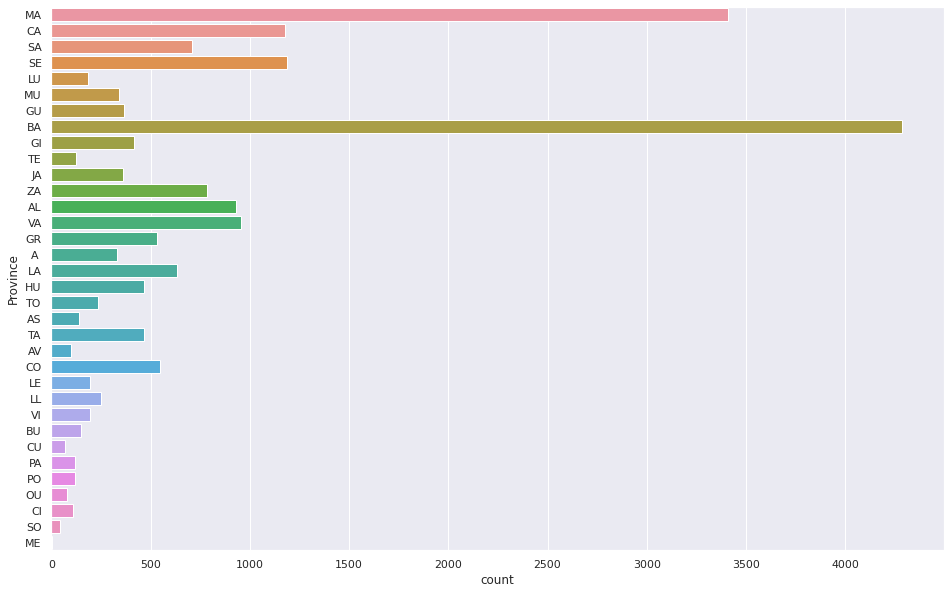

In [107]:
# Check the distribution
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(16, 10))
sns.countplot(y="Province", data=dataset[0])

In [108]:
dataset[0].Province.value_counts()

BA    4284
MA    3408
SE    1189
CA    1176
VA     957
AL     931
ZA     783
SA     710
LA     633
CO     550
GR     534
TA     466
HU     466
GI     415
GU     365
JA     360
MU     340
A      330
LL     249
TO     234
LE     197
VI     193
LU     185
BU     148
AS     137
TE     124
PO     119
PA     117
CI     109
AV      98
OU      77
CU      71
SO      43
ME       2
Name: Province, dtype: int64

In [109]:
dataset[0].Province.value_counts()/len(dataset[0])*100

BA    21.420
MA    17.040
SE     5.945
CA     5.880
VA     4.785
AL     4.655
ZA     3.915
SA     3.550
LA     3.165
CO     2.750
GR     2.670
TA     2.330
HU     2.330
GI     2.075
GU     1.825
JA     1.800
MU     1.700
A      1.650
LL     1.245
TO     1.170
LE     0.985
VI     0.965
LU     0.925
BU     0.740
AS     0.685
TE     0.620
PO     0.595
PA     0.585
CI     0.545
AV     0.490
OU     0.385
CU     0.355
SO     0.215
ME     0.010
Name: Province, dtype: float64

We have two provinces `BA` and `MA` most frequent than others. We can impute by random values

In [110]:
# We can impute missing values by random on first dataset
s = dataset[0]['Province'].value_counts(normalize=True)
missing = dataset[0]['Province'].isnull()
dataset[0].loc[missing,'Province'] = np.random.choice(s.index, size=len(dataset[0][missing]),
                                                      p=s.values)

In [111]:
# Repite that imputation missing values by random on second dataset
s = dataset[1]['Province'].value_counts(normalize=True)
missing = dataset[1]['Province'].isnull()
dataset[1].loc[missing,'Province'] = np.random.choice(s.index, size=len(dataset[1][missing]),
                                                      p=s.values)

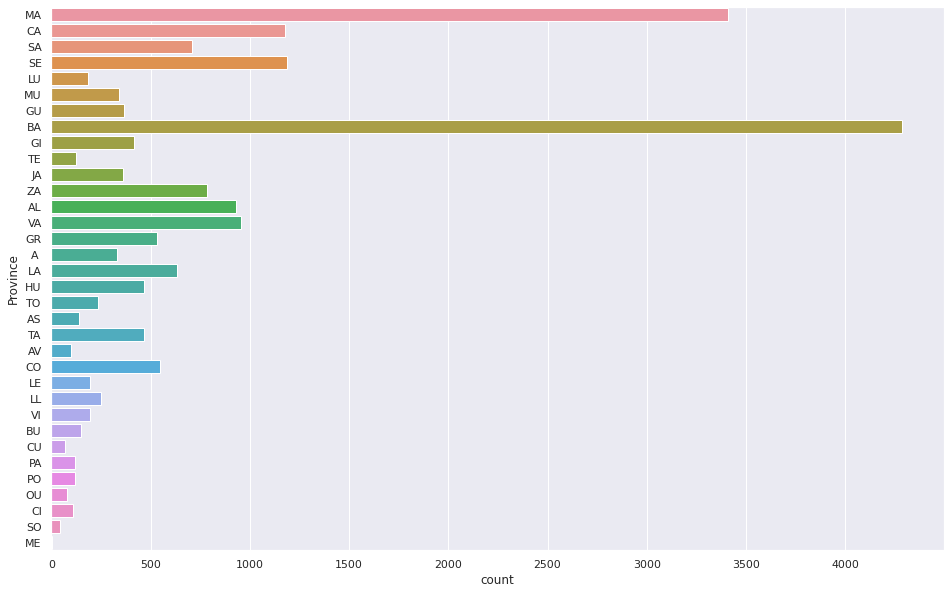

In [112]:
# Check the distribution
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(16, 10))
sns.countplot(y="Province", data=dataset[0])

In [113]:
dataset[0].Province.value_counts()/len(dataset[0])*100

BA    21.420
MA    17.040
SE     5.945
CA     5.880
VA     4.785
AL     4.655
ZA     3.915
SA     3.550
LA     3.165
CO     2.750
GR     2.670
TA     2.330
HU     2.330
GI     2.075
GU     1.825
JA     1.800
MU     1.700
A      1.650
LL     1.245
TO     1.170
LE     0.985
VI     0.965
LU     0.925
BU     0.740
AS     0.685
TE     0.620
PO     0.595
PA     0.585
CI     0.545
AV     0.490
OU     0.385
CU     0.355
SO     0.215
ME     0.010
Name: Province, dtype: float64

> That imputation is not very good way, but is a good alternative to assign null values by frequency value based on others one.

In [114]:
# Check another categorical variables
missing_zero_values_table(dataset[0])

Your selected dataframe has 33 columns and 20000 Rows.
There are 15 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Price Sensitivity,0,18525,92.6,18525,92.6,float64
Number of Mobile Phones,1797,12836,64.2,14633,73.2,float64
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
Birthdate,0,10488,52.4,10488,52.4,float64
Savings,7681,5155,25.8,12836,64.2,float64
House Price,0,5140,25.7,5140,25.7,float64
Income,0,5140,25.7,5140,25.7,float64
House Insurance,0,5140,25.7,5140,25.7,float64


## Thoughts about 1st part of Feature Engineering 

We impute missing values on categorical features and transformed some. We have `boolean variables`:
- ADSL
- 3G Devices
and will be considered as categorical and transformed.

## Drop variables

Unfortunately for this first part, we can drop only one variable `Price Sensitivity` for to have more than 70% and we cannot to grouped with another ones.

In [115]:
# Drop `Price Sensitivity`
dataset[0].drop(['Price Sensitivity'], axis=1, inplace=True)
dataset[1].drop(['Price Sensitivity'], axis=1, inplace=True)

* * *
## Binarizing categorical variables

We binarize categorical variables before modeling stage, where `m` are binary variable.

## Save 1st Wrangle and Cleanse data part

To be continued second part for numerical variables

In [116]:
# Save dataset0 and dataset1 for next step: Impute missing values for numerical variable.
dataset[0].to_csv('df2a_1.csv', index=False)
dataset[1].to_csv('df2a_2.csv', index=False)

* * *
### Estimated time to achieve 2a Wrangle and Cleanse data

The Second part has been achieved in `~3 hours`. We made investigation, analysis and transformation tasks.

To be continued with the 3rd part,  `2b - Wrangling & Cleansing data`...

## Data Science Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

0. Environment.
1. Check libraries version.
2. Import Libraries.
3. Question or problem definition.
4. Acquire dataset or training and testing data.
5. Analyze, identify patterns, and explore the data.

6. **Wrangle, prepare, cleanse the data.**
7. Feature Engineering
8. Model, predict and solve the problem.
9. Visualize, report, and present the problem solving steps and final solution.
10. Create or solve AI pipeline on Cloud, architecture solution and shows result

Could be to exist another substeps during Data Processing and Data Modeling, for to train and deploy many machine learning and/or deep learning combination pipelines.

## 2b Part - Wrangle and Cleanse data - categorical features

***

## Import Libraries and modules

We create grouping for different libraries and modules per workflow block or step.

In [122]:
#!pip install sklearn_pandas

In [123]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import xlrd, xdrlib

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
from sklearn_pandas import categorical_imputer, CategoricalImputer
from sklearn.pipeline import make_pipeline, make_union
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

***

## Load dataset

Only if we use different way to load dataset from cloud storage, google drive or locally, we develop different chunks or API connection.

In [ ]:
# Load first and second dataset saved before.
#data_1 = pd.read_csv("df2a_1.csv", index_col=False)
#data_2 = pd.read_csv("df2a_2.csv", index_col=False)
#dataset = [data_1, data_2]

In [ ]:
data_1.head(10)

In [ ]:
data_2.head(10)

***

## 5. Cleanse, Wrangle, Prepare the data and Feature Engineering


### 5.1 Missing Values

Many real-world datasets may contain missing values for various reasons. They are often encoded as NaNs, blanks or any other placeholders. Training a model with a dataset that has a lot of missing values can drastically impact the machine learning model’s quality. Some algorithms such as scikit-learn estimators assume that all values are numerical and have and hold meaningful value.

One way to handle this problem is to get rid of the observations that have missing data. However, you will risk losing data points with valuable information. A better strategy would be to impute the missing values. In other words, we need to infer those missing values from the existing part of the data. 

we will focus on 6 popular ways for data imputation for cross-sectional datasets:

* Do Nothing
* Imputation Using (Mean/Median) Values
* Imputation Using (Most Frequent) or (Zero/Constant) Values
* Imputation Using k-NN
* Imputation Using Multivariate Imputation by Chained Equation (MICE)
* Imputation Using Deep Learning (Datawig)

#### a. Do Nothing

That’s an easy one. You just let the algorithm handle the missing data. Some algorithms can factor in the missing values and learn the best imputation values for the missing data based on the training loss reduction (ie. XGBoost). Some others have the option to just ignore them (ie. LightGBM — use_missing=false). However, other algorithms will panic and throw an error complaining about the missing values (ie. Scikit learn — LinearRegression). In that case, you will need to handle the missing data and clean it before feeding it to the algorithm.

#### b. Imputation Using (Mean/Median) Values:

This works by calculating the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others. It can only be used with numeric data.

*Pros*:
Easy and fast.
Works well with small numerical datasets.

*Cons*:
Doesn’t factor the correlations between features. It only works on the column level.
Will give poor results on encoded categorical features (do NOT use it on categorical features).
Not very accurate.
Doesn’t account for the uncertainty in the imputations

#### c. Imputation Using (Most Frequent) or (Zero/Constant) Values

Most Frequent is another statistical strategy to impute missing values and YES!! It works with categorical features (strings or numerical representations) by replacing missing data with the most frequent values within each column.

*Pros*:
Works well with categorical features.

*Cons*:
It also doesn’t factor the correlations between features.
It can introduce bias in the data.

#### d. Imputation Using k-NN:

The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. This can be very useful in making predictions about the missing values by finding the k’s closest neighbours to the observation with missing data and then imputing them based on the non-missing values in the neighbourhood. Let’s see some example code using Impyute library which provides a simple and easy way to use KNN for imputation:

*Pros*:
Can be much more accurate than the mean, median or most frequent imputation methods (It depends on the dataset).

*Cons*:
Computationally expensive. KNN works by storing the whole training dataset in memory.
K-NN is quite sensitive to outliers in the data (unlike SVM)

#### e. Imputation Using Multivariate Imputation by Chained Equation (MICE)

This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns. For more information on the algorithm mechanics, you can refer to the Research Paper

#### f. Imputation Using Deep Learning (Datawig):

This method works very well with categorical and non-numerical features. It is a library that learns Machine Learning models using Deep Neural Networks to impute missing values in a dataframe. It also supports both CPU and GPU for training.

*Pros*:
Quite accurate compared to other methods.
It has some functions that can handle categorical data (Feature Encoder).
It supports CPUs and GPUs.

*Cons*:
Single Column imputation.
Can be quite slow with large datasets.
You have to specify the columns that contain information about the target column that will be imputed.


#### Other Imputation Methods:

##### Stochastic regression imputation:
It is quite similar to regression imputation which tries to predict the missing values by regressing it from other related variables in the same dataset plus some random residual value.

##### Extrapolation and Interpolation:
It tries to estimate values from other observations within the range of a discrete set of known data points.

##### Hot-Deck imputation:
Works by randomly choosing the missing value from a set of related and similar variables.


***

## Missing values and Imputation - stage 2

All variables with more >70% of missing values are dropped. We impute the other ones.

In [127]:
# Check null and NA values for both dataset by frequency first and absolute values after
for i in dataset:
    lista = []
    lista.append(i.isna().sum()/len(i)*100)
    print(lista)
    print("*-"*20)

[Obs                                 0.000
Sales                               0.000
PhoneType                           0.000
Email                               0.000
Tenure                              0.000
NumberofCampaigns                   0.000
ProdActive                          0.000
ProdBought                          0.000
Premium Offered                     0.000
Phone Call Day                      0.000
CodeCategory                        0.000
Birthdate                          52.440
Product Type                        0.000
Number of Semesters Paid            8.575
Socieconomic Status                 0.000
Province                            0.000
Right Address                       0.000
Living Area (m^2)                  25.680
House Price                        25.700
Income                             25.700
yearBuilt                          25.675
House Insurance                    25.700
Pension Plan                       25.700
Estimated number of cars         

## Feature engineering for numerical features
Create, transform and adapt at the model some variables

In [128]:
# Create a function to detect and shows missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [ ]:
# Check missing values for dataset0
missing_zero_values_table(dataset[0])

In [ ]:
# Check missing values for dataset_1
missing_zero_values_table(dataset[1])

In [ ]:
# Select numerical features
num_features_0 = dataset[0].select_dtypes(include=[np.number])
num_features_0.dtypes

In [ ]:
# Keep only variables with null values first dataset
miss_cols_df1 = [col for col in num_features_0.columns if num_features_0[col].isnull().any()]
miss_cols_df1

## Variables correlation

The `DataFrame.corr()` method displays the correlation (or relationship) between the columns. We’ll examine the correlations between the features and the target.

In [133]:
# Show 15 features with most correlation ratio
corr = num_features_0.corr()
print (corr['Sales'].sort_values(ascending=False)[:15], '\n')
print (corr['Sales'].sort_values(ascending=False)[-5:])

Sales                      1.000000
ProdActive                 0.503119
ProdBought                 0.413297
Email                      0.398181
NumberofCampaigns          0.047722
Tenure                     0.039253
Premium Offered            0.023216
Living Area (m^2)          0.010842
ADSL                       0.004852
3G Devices                 0.003945
Number of Fixed Lines      0.003067
Obs                       -0.005893
Number of Mobile Phones   -0.006225
Birthdate                 -0.007599
yearBuilt                 -0.009192
Name: Sales, dtype: float64 

House Price       -0.014788
Income            -0.014984
Pension Plan      -0.015254
House Insurance   -0.016273
Credit            -0.016325
Name: Sales, dtype: float64


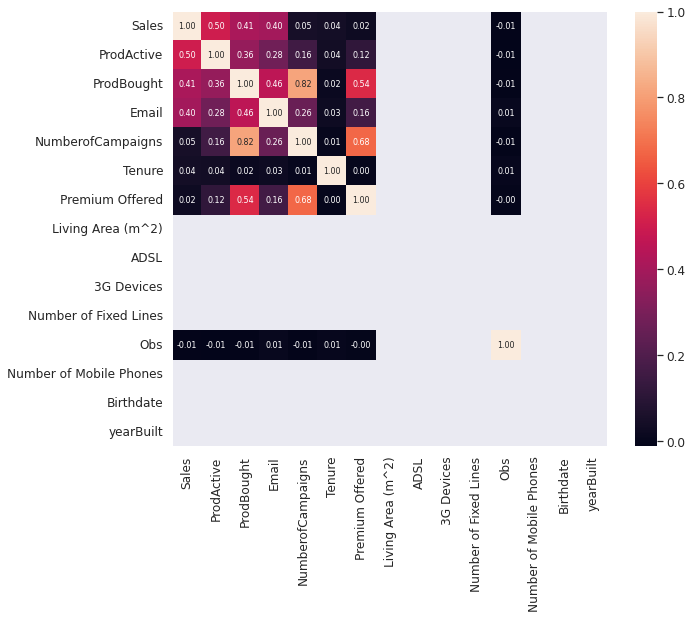

In [134]:
# Sales correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(10,8))
corrmat = num_features_0.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'Sales')['Sales'].index
cm = np.corrcoef(num_features_0[cols].values.T)
sns.set(font_scale=1.10)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Impute numerical features : Build a linear model

Let’s perform the final steps to prepare our data for modeling. We’ll separate the features and the target variable for modeling. We will assign the features to `X` and the target variable to `y`. We use `np.log()` as explained above to transform the y variable for the model. `data.drop([features], axis=1)` tells pandas which columns we want to exclude. We won’t include `indipendent var` for obvious reasons, and `Obs` is just an index with no relationship to `indipendent var`.

#### Prediction first part
- House Price
- Income
- House Insurance
- Pension Plan
- Credit
- Savings

In [135]:
sociodemoVars = ['House Price','Income','House Insurance',
            'Pension Plan','Credit','Savings']

In [136]:
miss_cols_df1

['Birthdate',
 'Living Area (m^2)',
 'House Price',
 'Income',
 'yearBuilt',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings',
 'Number of Mobile Phones',
 'Number of Fixed Lines',
 'ADSL',
 '3G Devices']

In [137]:
# Check correlation with House Price
# Show 15 features with most correlation ratio
def corrMissingValue(lista):
    corr = num_features_0.corr()
    for i in lista:
        print(corr[i].sort_values(ascending=False)[:15], '\n')
        print(corr[i].sort_values(ascending=False)[-5:])
        print("******NEXT CORRELATION*******")

In [138]:
corrMissingValue(sociodemoVars)

House Price                1.000000
House Insurance            0.987984
Credit                     0.985513
Pension Plan               0.983682
Income                     0.981610
Savings                    0.916722
Living Area (m^2)          0.297586
Birthdate                  0.026680
Email                      0.001864
3G Devices                 0.001828
Number of Fixed Lines     -0.001038
ProdActive                -0.004195
Tenure                    -0.004790
Number of Mobile Phones   -0.007351
Obs                       -0.008929
Name: House Price, dtype: float64 

Sales               -0.014788
Premium Offered     -0.016997
NumberofCampaigns   -0.020859
ProdBought          -0.028301
yearBuilt           -0.046106
Name: House Price, dtype: float64
******NEXT CORRELATION*******
Income                     1.000000
House Insurance            0.987961
Credit                     0.985489
Pension Plan               0.983658
House Price                0.981610
Savings                    0.9

> All of those variables have high correlation ratio betweeness because are related with `status` and `socio-demographics` variables.

## Imputation `discrete variables` features

We realize imputation task by `random` function based of frequency.

### Imputation `Birthdate` feature

We use random function to impute this feature

In [139]:
# We can impute missing values by random
# We can impute missing values by random on first dataset
s = dataset[0]['Birthdate'].value_counts(normalize=True)
s

1964.0    0.048465
1980.0    0.033747
1973.0    0.032590
1977.0    0.032275
1979.0    0.031854
1967.0    0.030278
1974.0    0.029962
1965.0    0.029752
1984.0    0.029542
1976.0    0.029226
1981.0    0.029226
1975.0    0.028911
1966.0    0.028701
1969.0    0.028595
1982.0    0.028490
1971.0    0.028385
1983.0    0.028175
1972.0    0.027860
1978.0    0.027124
1970.0    0.026493
1968.0    0.026072
1944.0    0.020500
1958.0    0.020185
1962.0    0.019975
1960.0    0.019765
1947.0    0.019239
1961.0    0.019239
1954.0    0.019029
1953.0    0.018818
1946.0    0.018398
1956.0    0.018398
1949.0    0.017977
1945.0    0.017872
1950.0    0.017557
1963.0    0.017347
1959.0    0.017136
1955.0    0.017136
1951.0    0.016926
1952.0    0.016821
1957.0    0.016085
1948.0    0.015875
Name: Birthdate, dtype: float64

In [140]:
missing = dataset[0]['Birthdate'].isnull()
missing

0         True
1        False
2        False
3        False
4        False
         ...  
19995     True
19996    False
19997    False
19998     True
19999     True
Name: Birthdate, Length: 20000, dtype: bool

In [141]:
dataset[0].loc[missing,'Birthdate'] = np.random.choice(s.index, size=len(dataset[0][missing]),
                                                      p=s.values).astype(int)

In [142]:
dataset[0]['Birthdate']

0        1944.0
1        1961.0
2        1950.0
3        1962.0
4        1969.0
          ...  
19995    1968.0
19996    1983.0
19997    1965.0
19998    1983.0
19999    1945.0
Name: Birthdate, Length: 20000, dtype: float64

In [143]:
# Doing same steps before for the second dataset
s = dataset[1]['Birthdate'].value_counts(normalize=True)
missing = dataset[1]['Birthdate'].isnull()
dataset[1].loc[missing,'Birthdate'] = np.random.choice(s.index, size=len(dataset[1][missing]),
                                                      p=s.values).astype(int)
dataset[1]['Birthdate']

0       1962.0
1       1981.0
2       1967.0
3       1976.0
4       1949.0
         ...  
9995    1947.0
9996    1966.0
9997    1964.0
9998    1972.0
9999    1965.0
Name: Birthdate, Length: 10000, dtype: float64

### Imputation `Number of Mobile Phone` feature

We use random function to impute this feature

In [144]:
# Check missing values for dataset0
missing_zero_values_table(dataset[0])

Your selected dataframe has 32 columns and 20000 Rows.
There are 13 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Number of Mobile Phones,1797,12836,64.2,14633,73.2,float64
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
Savings,7681,5155,25.8,12836,64.2,float64
House Price,0,5140,25.7,5140,25.7,float64
Income,0,5140,25.7,5140,25.7,float64
House Insurance,0,5140,25.7,5140,25.7,float64
Pension Plan,0,5140,25.7,5140,25.7,float64
Credit,0,5140,25.7,5140,25.7,float64


In [145]:
dataset[0]['Number of Mobile Phones'].value_counts()

3.0    1804
2.0    1803
0.0    1797
1.0    1760
Name: Number of Mobile Phones, dtype: int64

In [146]:
# Doing same steps before
s = dataset[0]['Number of Mobile Phones'].value_counts(normalize=True)
missing = dataset[0]['Number of Mobile Phones'].isnull()
dataset[0].loc[missing,'Number of Mobile Phones'] = np.random.choice(s.index, size=len(dataset[0][missing]),
                                                      p=s.values)
dataset[0]['Number of Mobile Phones']

0        3.0
1        1.0
2        3.0
3        3.0
4        1.0
        ... 
19995    1.0
19996    2.0
19997    3.0
19998    1.0
19999    0.0
Name: Number of Mobile Phones, Length: 20000, dtype: float64

In [147]:
# Evaluate the results
dataset[0]['Number of Mobile Phones'].value_counts()

3.0    5152
0.0    5069
2.0    4973
1.0    4806
Name: Number of Mobile Phones, dtype: int64

In [148]:
# Check missing values for dataset1
missing_zero_values_table(dataset[1])

Your selected dataframe has 26 columns and 10000 Rows.
There are 12 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Number of Mobile Phones,914,6240,62.4,7154,71.5,float64
Number of Fixed Lines,1258,6240,62.4,7498,75.0,float64
ADSL,1845,6240,62.4,8085,80.8,float64
3G Devices,1883,6240,62.4,8123,81.2,float64
House Price,0,2170,21.7,2170,21.7,float64
Living Area (m^2),15,2169,21.7,2184,21.8,float64
Income,0,2169,21.7,2169,21.7,float64
yearBuilt,0,2169,21.7,2169,21.7,float64
House Insurance,0,2169,21.7,2169,21.7,float64
Pension Plan,0,2169,21.7,2169,21.7,float64


In [149]:
dataset[1]['Number of Mobile Phones'].value_counts()

3.0    960
2.0    951
1.0    935
0.0    914
Name: Number of Mobile Phones, dtype: int64

In [150]:
# Doing same steps before for second dataset
s = dataset[1]['Number of Mobile Phones'].value_counts(normalize=True)
missing = dataset[1]['Number of Mobile Phones'].isnull()
dataset[1].loc[missing,'Number of Mobile Phones'] = np.random.choice(s.index, size=len(dataset[1][missing]),
                                                      p=s.values)
dataset[1]['Number of Mobile Phones']

0       2.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    1.0
9996    2.0
9997    0.0
9998    2.0
9999    2.0
Name: Number of Mobile Phones, Length: 10000, dtype: float64

In [152]:
# Check and evaluate
dataset[1]['Number of Mobile Phones'].value_counts()

3.0    2609
2.0    2493
1.0    2463
0.0    2435
Name: Number of Mobile Phones, dtype: int64

### Imputation `Number of Fixed Lines` feature

We use random function to impute this feature

In [153]:
# Check missing values for dataset0
missing_zero_values_table(dataset[0])

Your selected dataframe has 32 columns and 20000 Rows.
There are 12 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Number of Fixed Lines,2374,12836,64.2,15210,76.0,float64
ADSL,3566,12836,64.2,16402,82.0,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
Savings,7681,5155,25.8,12836,64.2,float64
House Price,0,5140,25.7,5140,25.7,float64
Income,0,5140,25.7,5140,25.7,float64
House Insurance,0,5140,25.7,5140,25.7,float64
Pension Plan,0,5140,25.7,5140,25.7,float64
Credit,0,5140,25.7,5140,25.7,float64
Living Area (m^2),29,5136,25.7,5165,25.8,float64


In [154]:
dataset[0]['Number of Fixed Lines'].value_counts()

2.0    2413
1.0    2377
0.0    2374
Name: Number of Fixed Lines, dtype: int64

In [155]:
# Doing same steps before for first dataset
s = dataset[0]['Number of Fixed Lines'].value_counts(normalize=True)
missing = dataset[0]['Number of Fixed Lines'].isnull()
dataset[0].loc[missing,'Number of Fixed Lines'] = np.random.choice(s.index, size=len(dataset[0][missing]),
                                                      p=s.values)
dataset[0]['Number of Fixed Lines']

0        2.0
1        2.0
2        2.0
3        2.0
4        0.0
        ... 
19995    2.0
19996    0.0
19997    0.0
19998    1.0
19999    0.0
Name: Number of Fixed Lines, Length: 20000, dtype: float64

In [156]:
# Evaluate the results
dataset[0]['Number of Fixed Lines'].value_counts()

2.0    6884
1.0    6565
0.0    6551
Name: Number of Fixed Lines, dtype: int64

In [157]:
# Check missing values for dataset1
missing_zero_values_table(dataset[1])

Your selected dataframe has 26 columns and 10000 Rows.
There are 11 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Number of Fixed Lines,1258,6240,62.4,7498,75.0,float64
ADSL,1845,6240,62.4,8085,80.8,float64
3G Devices,1883,6240,62.4,8123,81.2,float64
House Price,0,2170,21.7,2170,21.7,float64
Living Area (m^2),15,2169,21.7,2184,21.8,float64
Income,0,2169,21.7,2169,21.7,float64
yearBuilt,0,2169,21.7,2169,21.7,float64
House Insurance,0,2169,21.7,2169,21.7,float64
Pension Plan,0,2169,21.7,2169,21.7,float64
Credit,0,2169,21.7,2169,21.7,float64


In [158]:
dataset[1]['Number of Fixed Lines'].value_counts()

1.0    1273
0.0    1258
2.0    1229
Name: Number of Fixed Lines, dtype: int64

In [159]:
# Doing same steps before for second dataset
s = dataset[1]['Number of Fixed Lines'].value_counts(normalize=True)
missing = dataset[1]['Number of Fixed Lines'].isnull()
dataset[1].loc[missing,'Number of Fixed Lines'] = np.random.choice(s.index, size=len(dataset[1][missing]),
                                                      p=s.values)
dataset[1]['Number of Fixed Lines']

0       1.0
1       0.0
2       0.0
3       1.0
4       2.0
       ... 
9995    1.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: Number of Fixed Lines, Length: 10000, dtype: float64

In [160]:
# Evaluate the results
dataset[1]['Number of Fixed Lines'].value_counts()

1.0    3466
0.0    3361
2.0    3173
Name: Number of Fixed Lines, dtype: int64

### Imputation `ADSL` feature

We use random function to impute this feature

In [161]:
# Check missing values for dataset0
missing_zero_values_table(dataset[0])

Your selected dataframe has 32 columns and 20000 Rows.
There are 11 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
ADSL,3566,12836,64.2,16402,82.0,float64
3G Devices,3555,12836,64.2,16391,82.0,float64
Savings,7681,5155,25.8,12836,64.2,float64
House Price,0,5140,25.7,5140,25.7,float64
Income,0,5140,25.7,5140,25.7,float64
House Insurance,0,5140,25.7,5140,25.7,float64
Pension Plan,0,5140,25.7,5140,25.7,float64
Credit,0,5140,25.7,5140,25.7,float64
Living Area (m^2),29,5136,25.7,5165,25.8,float64
yearBuilt,0,5135,25.7,5135,25.7,float64


In [162]:
dataset[0]['ADSL'].value_counts()

1.0    3598
0.0    3566
Name: ADSL, dtype: int64

In [163]:
# Doing same steps before for first dataset
s = dataset[0]['ADSL'].value_counts(normalize=True)
missing = dataset[0]['ADSL'].isnull()
dataset[0].loc[missing,'ADSL'] = np.random.choice(s.index, size=len(dataset[0][missing]),
                                                      p=s.values)
dataset[0]['ADSL']

0        0.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
19995    0.0
19996    0.0
19997    1.0
19998    1.0
19999    0.0
Name: ADSL, Length: 20000, dtype: float64

In [164]:
# Evaluate the results
dataset[0]['ADSL'].value_counts()

1.0    10005
0.0     9995
Name: ADSL, dtype: int64

In [165]:
# Check missing values for dataset2
missing_zero_values_table(dataset[1])

Your selected dataframe has 26 columns and 10000 Rows.
There are 10 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
ADSL,1845,6240,62.4,8085,80.8,float64
3G Devices,1883,6240,62.4,8123,81.2,float64
House Price,0,2170,21.7,2170,21.7,float64
Living Area (m^2),15,2169,21.7,2184,21.8,float64
Income,0,2169,21.7,2169,21.7,float64
yearBuilt,0,2169,21.7,2169,21.7,float64
House Insurance,0,2169,21.7,2169,21.7,float64
Pension Plan,0,2169,21.7,2169,21.7,float64
Credit,0,2169,21.7,2169,21.7,float64
Savings,4071,2169,21.7,6240,62.4,float64


In [166]:
dataset[1]['ADSL'].value_counts()

1.0    1915
0.0    1845
Name: ADSL, dtype: int64

In [167]:
# Doing same steps before for second dataset
s = dataset[1]['ADSL'].value_counts(normalize=True)
missing = dataset[1]['ADSL'].isnull()
dataset[1].loc[missing,'ADSL'] = np.random.choice(s.index, size=len(dataset[1][missing]),
                                                      p=s.values)
dataset[1]['ADSL']

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
9995    1.0
9996    0.0
9997    0.0
9998    0.0
9999    1.0
Name: ADSL, Length: 10000, dtype: float64

In [168]:
# Evaluate the results
dataset[1]['ADSL'].value_counts()

1.0    5132
0.0    4868
Name: ADSL, dtype: int64

### Imputation `3G Devices` feature

We use random function to impute this feature

In [169]:
# Check missing values for dataset0
missing_zero_values_table(dataset[0])

Your selected dataframe has 32 columns and 20000 Rows.
There are 10 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
3G Devices,3555,12836,64.2,16391,82.0,float64
Savings,7681,5155,25.8,12836,64.2,float64
House Price,0,5140,25.7,5140,25.7,float64
Income,0,5140,25.7,5140,25.7,float64
House Insurance,0,5140,25.7,5140,25.7,float64
Pension Plan,0,5140,25.7,5140,25.7,float64
Credit,0,5140,25.7,5140,25.7,float64
Living Area (m^2),29,5136,25.7,5165,25.8,float64
yearBuilt,0,5135,25.7,5135,25.7,float64
Number of Semesters Paid,0,1715,8.6,1715,8.6,category


In [170]:
dataset[0]['3G Devices'].value_counts()

1.0    3609
0.0    3555
Name: 3G Devices, dtype: int64

In [171]:
# Doing same steps before for first dataset
s = dataset[0]['3G Devices'].value_counts(normalize=True)
missing = dataset[0]['3G Devices'].isnull()
dataset[0].loc[missing,'3G Devices'] = np.random.choice(s.index, size=len(dataset[0][missing]),
                                                      p=s.values)
dataset[0]['3G Devices']

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
19995    0.0
19996    0.0
19997    1.0
19998    0.0
19999    0.0
Name: 3G Devices, Length: 20000, dtype: float64

In [172]:
# Evaluate the results
dataset[0]['3G Devices'].value_counts()

1.0    10123
0.0     9877
Name: 3G Devices, dtype: int64

In [173]:
# Check missing values for dataset1
missing_zero_values_table(dataset[1])

Your selected dataframe has 26 columns and 10000 Rows.
There are 9 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
3G Devices,1883,6240,62.4,8123,81.2,float64
House Price,0,2170,21.7,2170,21.7,float64
Living Area (m^2),15,2169,21.7,2184,21.8,float64
Income,0,2169,21.7,2169,21.7,float64
yearBuilt,0,2169,21.7,2169,21.7,float64
House Insurance,0,2169,21.7,2169,21.7,float64
Pension Plan,0,2169,21.7,2169,21.7,float64
Credit,0,2169,21.7,2169,21.7,float64
Savings,4071,2169,21.7,6240,62.4,float64


In [174]:
dataset[1]['3G Devices'].value_counts()

0.0    1883
1.0    1877
Name: 3G Devices, dtype: int64

In [175]:
# Doing same steps before for first dataset
s = dataset[1]['3G Devices'].value_counts(normalize=True)
missing = dataset[1]['3G Devices'].isnull()
dataset[1].loc[missing,'3G Devices'] = np.random.choice(s.index, size=len(dataset[1][missing]),
                                                      p=s.values)
dataset[1]['3G Devices']

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    1.0
9999    0.0
Name: 3G Devices, Length: 10000, dtype: float64

In [176]:
# Evaluate the results
dataset[1]['3G Devices'].value_counts()

0.0    5047
1.0    4953
Name: 3G Devices, dtype: int64

### Imputation `yearBuilt` feature

We use random function to impute this feature

In [177]:
# Check missing values for dataset0
missing_zero_values_table(dataset[0])

Your selected dataframe has 32 columns and 20000 Rows.
There are 9 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Savings,7681,5155,25.8,12836,64.2,float64
House Price,0,5140,25.7,5140,25.7,float64
Income,0,5140,25.7,5140,25.7,float64
House Insurance,0,5140,25.7,5140,25.7,float64
Pension Plan,0,5140,25.7,5140,25.7,float64
Credit,0,5140,25.7,5140,25.7,float64
Living Area (m^2),29,5136,25.7,5165,25.8,float64
yearBuilt,0,5135,25.7,5135,25.7,float64
Number of Semesters Paid,0,1715,8.6,1715,8.6,category


In [178]:
dataset[0]['yearBuilt'].value_counts()

1970.0    573
1980.0    496
2007.0    434
1975.0    421
2008.0    409
         ... 
1907.0      2
1904.0      2
1903.0      2
1909.0      2
1914.0      1
Name: yearBuilt, Length: 112, dtype: int64

In [179]:
# Doing same steps before for first dataset
s = dataset[0]['yearBuilt'].value_counts(normalize=True)
missing = dataset[0]['yearBuilt'].isnull()
dataset[0].loc[missing,'yearBuilt'] = np.random.choice(s.index, size=len(dataset[0][missing]),
                                                      p=s.values)
dataset[0]['yearBuilt']

0        2005.0
1        1998.0
2        1974.0
3        2007.0
4        1985.0
          ...  
19995    1969.0
19996    1980.0
19997    1984.0
19998    1975.0
19999    1910.0
Name: yearBuilt, Length: 20000, dtype: float64

In [180]:
# Evaluate the results
dataset[0]['yearBuilt'].value_counts()

1970.0    764
1980.0    660
2007.0    572
1975.0    570
2008.0    537
         ... 
1909.0      3
1906.0      3
1922.0      3
1904.0      2
1914.0      1
Name: yearBuilt, Length: 112, dtype: int64

In [181]:
# Check missing values for dataset1
missing_zero_values_table(dataset[1])

Your selected dataframe has 26 columns and 10000 Rows.
There are 8 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
House Price,0,2170,21.7,2170,21.7,float64
Living Area (m^2),15,2169,21.7,2184,21.8,float64
Income,0,2169,21.7,2169,21.7,float64
yearBuilt,0,2169,21.7,2169,21.7,float64
House Insurance,0,2169,21.7,2169,21.7,float64
Pension Plan,0,2169,21.7,2169,21.7,float64
Credit,0,2169,21.7,2169,21.7,float64
Savings,4071,2169,21.7,6240,62.4,float64


In [182]:
dataset[1]['yearBuilt'].value_counts()

1980.0    295
1970.0    263
2008.0    240
1975.0    220
2007.0    216
         ... 
1914.0      2
1911.0      1
1922.0      1
1912.0      1
1907.0      1
Name: yearBuilt, Length: 108, dtype: int64

In [183]:
# Doing same steps before for second dataset
s = dataset[1]['yearBuilt'].value_counts(normalize=True)
missing = dataset[1]['yearBuilt'].isnull()
dataset[1].loc[missing,'yearBuilt'] = np.random.choice(s.index, size=len(dataset[1][missing]),
                                                      p=s.values)
dataset[1]['yearBuilt']

0       1961.0
1       1955.0
2       2001.0
3       1980.0
4       1968.0
         ...  
9995    1976.0
9996    1995.0
9997    1960.0
9998    1931.0
9999    1972.0
Name: yearBuilt, Length: 10000, dtype: float64

In [184]:
# Evaluate the results
dataset[1]['yearBuilt'].value_counts()

1980.0    390
1970.0    327
2008.0    303
2007.0    277
2006.0    272
         ... 
1917.0      2
1911.0      1
1922.0      1
1912.0      1
1907.0      1
Name: yearBuilt, Length: 108, dtype: int64

* * *
> We made an alternative imputation task for numerical features, we choose for missing values a random function by frequency base.

## Imputation `continuous variables` features

We use prediction model based of `linear regression` for variables like accounting and pricing.

The task is very simple: 
* check for each feature where miss values
* we calculate correlation based on feature and predictor variable
* train-test for NaN values vs Actual values
* apply prediction model to dataset

In [185]:
# Update missing values based of numerical features
# Select numerical features
num_features_0 = dataset[0].select_dtypes(include=[np.number])
num_features_0.dtypes
# Keep only variables with null values first dataset
miss_cols_df1 = [col for col in num_features_0.columns if num_features_0[col].isnull().any()]

In [186]:
miss_cols_df1

['Living Area (m^2)',
 'House Price',
 'Income',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings']

In [187]:
# Update missing values based of numerical features
# Select numerical features
num_features_1 = dataset[1].select_dtypes(include=[np.number])
num_features_1.dtypes
# Keep only variables with null values first dataset
miss_cols_df2 = [col for col in num_features_1.columns if num_features_1[col].isnull().any()]
miss_cols_df2

['Living Area (m^2)',
 'House Price',
 'Income',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings']

In [188]:
# Keep only 15 high correlated variables with the feature
jcols = miss_cols_df1
notnans = dataset[0][jcols].notnull().all(axis=1)
df_notnans = dataset[0][notnans]

### Impute `Living Area (m^2)` feature

In [189]:
# Keep only 15 high correlated variables with the predicted feature
icols = corrmat.nlargest(k, 'Living Area (m^2)')['Living Area (m^2)'].index
icols

Index(['Living Area (m^2)', 'House Price', 'Income', 'House Insurance',
       'Credit', 'Pension Plan', 'Savings', 'Birthdate', '3G Devices', 'Sales',
       'Number of Mobile Phones', 'Obs', 'Email', 'Tenure', 'ProdActive'],
      dtype='object')

In [190]:
icols = icols.drop('Living Area (m^2)')
icols

Index(['House Price', 'Income', 'House Insurance', 'Credit', 'Pension Plan',
       'Savings', 'Birthdate', '3G Devices', 'Sales',
       'Number of Mobile Phones', 'Obs', 'Email', 'Tenure', 'ProdActive'],
      dtype='object')

In [192]:
df_notnans[jcols]['Living Area (m^2)']

0          68.28964
1          85.60244
2         170.12964
3         158.64584
6         211.38824
            ...    
19995      95.37104
19996      96.42964
19997    1009.63964
19998     414.67964
19999      57.75724
Name: Living Area (m^2), Length: 14845, dtype: float64

In [194]:
# Split into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(df_notnans[icols], df_notnans[jcols]['Living Area (m^2)'],
                                                    train_size=0.75,
                                                    random_state=42)

In [195]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11133, 14), (3712, 14), (11133,), (3712,))

In [196]:
X_train, X_test

(         House Price        Income  House Insurance       Credit  \
 10986  148436.507115  40266.921114        4267.2078  11768.24886   
 7721   130734.933615  35405.790714        4456.5138  10344.62226   
 16836  118923.069915  46605.968514        5896.5318  13624.66326   
 4118   135180.442215  36626.604714        4613.4738  10702.13406   
 16082  186516.836415  50724.366714        6426.0378  14830.77666   
 ...              ...           ...              ...          ...   
 7025   220705.617015  60113.130714        7633.1718  17580.34326   
 18090   36158.545215   9433.662714        1117.2258   2738.49906   
 7294    80933.684715  42673.886514        5390.9838  12473.13726   
 1172   230102.530515  62693.661114        7964.9478  18336.07986   
 9793   223278.704415  60819.738714        7724.0178  17787.27846   
 
        Pension Plan    Savings  Birthdate  3G Devices  Sales  \
 10986   25957.90648      0.000     1980.0         0.0      0   
 7721    22856.02088      0.000     1984

In [197]:
# Build de model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [198]:
# Check the prediction score
score = model.score(X_test, y_test)
print("The prediction score of Living Area (m^2) feature or R^2 on the test data is {:.2f}%".format(score*100))
#print ("R^2 is: \n", model.score(X_test, y_test))

The prediction score of Living Area (m^2) feature or R^2 on the test data is 7.46%


> In this case we reject the linear regression model and we apply an alternative based of YearBuilt, House Price

In [202]:
# Start with the alternative
icols = ['yearBuilt', 'House Price', 'House Insurance', 'Credit',
         'Income', 'Pension Plan', 'Savings', 'Birthdate']

In [203]:
df_notnans[jcols]['Living Area (m^2)']

0          68.28964
1          85.60244
2         170.12964
3         158.64584
6         211.38824
            ...    
19995      95.37104
19996      96.42964
19997    1009.63964
19998     414.67964
19999      57.75724
Name: Living Area (m^2), Length: 14845, dtype: float64

In [204]:
# Split into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(df_notnans[icols], df_notnans[jcols]['Living Area (m^2)'],
                                                    train_size=0.75,
                                                    random_state=42)

In [205]:
# Build de model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [206]:
# Check the prediction score
score = model.score(X_test, y_test)
print("The prediction score of Living Area (m^2) feature or R^2 on the test data is {:.2f}%".format(score*100))
#print ("R^2 is: \n", model.score(X_test, y_test))

The prediction score of Living Area (m^2) feature or R^2 on the test data is 6.72%


> Neither with selected features we improve model. Start with random choice features

In [207]:
# Check frequency
dataset[0]['Living Area (m^2)'].value_counts()

130.59964    121
165.43964     39
106.47964     38
133.27964     37
93.07964      34
            ... 
173.07764      1
203.30804      1
74.61444       1
129.86264      1
57.75724       1
Name: Living Area (m^2), Length: 7142, dtype: int64

In [208]:
# We can impute missing values by random on first dataset
s = dataset[0]['Living Area (m^2)'].value_counts(normalize=True)
missing = dataset[0]['Living Area (m^2)'].isnull()
dataset[0].loc[missing,'Living Area (m^2)'] = np.random.choice(s.index, size=len(dataset[0][missing]),
                                                      p=s.values)
dataset[0]['Living Area (m^2)'].value_counts()

130.59964    162
165.43964     56
152.03964     49
133.27964     49
106.47964     48
            ... 
156.09984      1
117.77584      1
72.24264       1
52.69204       1
57.75724       1
Name: Living Area (m^2), Length: 7142, dtype: int64

In [209]:
# We can impute missing values by random on second dataset
s = dataset[1]['Living Area (m^2)'].value_counts(normalize=True)
missing = dataset[1]['Living Area (m^2)'].isnull()
dataset[1].loc[missing,'Living Area (m^2)'] = np.random.choice(s.index, size=len(dataset[1][missing]),
                                                      p=s.values)
dataset[1]['Living Area (m^2)'].value_counts()

131.0520    85
65.6600     28
80.1320     28
100.2320    27
165.8920    27
            ..
412.4520     1
130.7170     1
24.7632      1
46.5784      1
108.3658     1
Name: Living Area (m^2), Length: 4643, dtype: int64

> Again, we have impute all missing values, in last case another random function instead linear regression model.

### Impute `House Price` feature

Start with the first feature, House Price, based of the high correlation variables

In [210]:
# Update missing values based of numerical features
# Select numerical features
num_features_0 = dataset[0].select_dtypes(include=[np.number])
num_features_0.dtypes
# Keep only variables with null values first dataset
miss_cols_df1 = [col for col in num_features_0.columns if num_features_0[col].isnull().any()]

In [211]:
miss_cols_df1

['House Price',
 'Income',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings']

In [213]:
# Update missing values based of numerical features
# Select numerical features
num_features_1 = dataset[1].select_dtypes(include=[np.number])
num_features_1.dtypes
# Keep only variables with null values first dataset
miss_cols_df2 = [col for col in num_features_1.columns if num_features_1[col].isnull().any()]
miss_cols_df2

['House Price',
 'Income',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings']

In [214]:
# Keep only 15 high correlated variables with the feature
icols = corrmat.nlargest(k, 'House Price')['House Price'].index
icols

Index(['House Price', 'House Insurance', 'Credit', 'Pension Plan', 'Income',
       'Savings', 'Living Area (m^2)', 'Birthdate', 'Email', '3G Devices',
       'Number of Fixed Lines', 'ProdActive', 'Tenure',
       'Number of Mobile Phones', 'Obs'],
      dtype='object')

In [215]:
icols = icols.drop(['House Price', 'Obs'])

In [216]:
icols

Index(['House Insurance', 'Credit', 'Pension Plan', 'Income', 'Savings',
       'Living Area (m^2)', 'Birthdate', 'Email', '3G Devices',
       'Number of Fixed Lines', 'ProdActive', 'Tenure',
       'Number of Mobile Phones'],
      dtype='object')

In [217]:
# Keep indipendent variables col
jcols = miss_cols_df1
jcols

['House Price',
 'Income',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings']

In [218]:
notnans = dataset[0][jcols].notnull().all(axis=1)
df_notnans = dataset[0][notnans]
df_notnans

,Obs,Sales,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Phone Call Day,...,Pension Plan,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House
0,1,0,FIXED / LAND PHONE,0,2012,2,0,0,11.12,Wednesday,...,76897.09528,two,Low,35147.05566,0.000,3.0,2.0,0.0,1.0,Urban
1,2,1,MOBILE PHONE,0,2011,2,0,1,11.12,Thrusday,...,18037.38088,None,Low,8133.08226,0.000,1.0,2.0,1.0,1.0,Rustic
2,3,0,FIXED / LAND PHONE,0,1992,2,0,0,14.50,Thrusday,...,69779.49768,two,Low,31880.39706,98010.783,3.0,2.0,1.0,0.0,Urban
3,4,0,MOBILE PHONE,0,2011,2,0,0,14.50,Wednesday,...,40574.30488,One,Low,18476.52126,0.000,3.0,2.0,0.0,0.0,Urban
6,7,0,FIXED / LAND PHONE,0,2012,2,0,0,11.12,Tuesday,...,23349.46248,None,Low,10571.08986,0.000,2.0,2.0,1.0,1.0,Rustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,FIXED / LAND PHONE,0,2013,2,0,0,14.50,Thrusday,...,31736.20088,None,Low,14420.22726,44352.684,1.0,2.0,0.0,0.0,Rustic
19996,19997,0,FIXED / LAND PHONE,0,2013,2,0,0,14.50,Friday,...,21709.78488,None,Low,9818.55126,0.000,2.0,0.0,0.0,0.0,Urban
19997,19998,0,FIXED / LAND PHONE,0,2009,4,0,1,14.50,Monday,...,33171.76968,None,Low,15079.08906,46377.495,3.0,0.0,1.0,1.0,Urban
19998,19999,0,FIXED / LAND PHONE,0,2012,4,0,0,14.50,Monday,...,67326.33288,two,Low,30754.50426,94550.706,1.0,1.0,1.0,0.0,Urban


In [219]:
df_notnans.columns

Index(['Obs', 'Sales', 'PhoneType', 'Email', 'Tenure', 'NumberofCampaigns',
       'ProdActive', 'ProdBought', 'Premium Offered', 'Phone Call Day',
       'CodeCategory', 'Birthdate', 'Product Type', 'Number of Semesters Paid',
       'Socieconomic Status', 'Province', 'Right Address', 'Living Area (m^2)',
       'House Price', 'Income', 'yearBuilt', 'House Insurance', 'Pension Plan',
       'Estimated number of cars', 'Probability of Second Residence', 'Credit',
       'Savings', 'Number of Mobile Phones', 'Number of Fixed Lines', 'ADSL',
       '3G Devices', 'Type of House'],
      dtype='object')

In [220]:
X = df_notnans.drop(['Obs','House Price'], axis=1)
X

,Sales,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Phone Call Day,CodeCategory,...,Pension Plan,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House
0,0,FIXED / LAND PHONE,0,2012,2,0,0,11.12,Wednesday,Not Interested,...,76897.09528,two,Low,35147.05566,0.000,3.0,2.0,0.0,1.0,Urban
1,1,MOBILE PHONE,0,2011,2,0,1,11.12,Thrusday,Sale,...,18037.38088,None,Low,8133.08226,0.000,1.0,2.0,1.0,1.0,Rustic
2,0,FIXED / LAND PHONE,0,1992,2,0,0,14.50,Thrusday,Not Interested,...,69779.49768,two,Low,31880.39706,98010.783,3.0,2.0,1.0,0.0,Urban
3,0,MOBILE PHONE,0,2011,2,0,0,14.50,Wednesday,Not Interested,...,40574.30488,One,Low,18476.52126,0.000,3.0,2.0,0.0,0.0,Urban
6,0,FIXED / LAND PHONE,0,2012,2,0,0,11.12,Tuesday,Ineligible,...,23349.46248,None,Low,10571.08986,0.000,2.0,2.0,1.0,1.0,Rustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,FIXED / LAND PHONE,0,2013,2,0,0,14.50,Thrusday,Ineligible,...,31736.20088,None,Low,14420.22726,44352.684,1.0,2.0,0.0,0.0,Rustic
19996,0,FIXED / LAND PHONE,0,2013,2,0,0,14.50,Friday,Not Interested,...,21709.78488,None,Low,9818.55126,0.000,2.0,0.0,0.0,0.0,Urban
19997,0,FIXED / LAND PHONE,0,2009,4,0,1,14.50,Monday,Not Interested,...,33171.76968,None,Low,15079.08906,46377.495,3.0,0.0,1.0,1.0,Urban
19998,0,FIXED / LAND PHONE,0,2012,4,0,0,14.50,Monday,Not Interested,...,67326.33288,two,Low,30754.50426,94550.706,1.0,1.0,1.0,0.0,Urban


In [223]:
X[icols]

,House Insurance,Credit,Pension Plan,Income,Savings,Living Area (m^2),Birthdate,Email,3G Devices,Number of Fixed Lines,ProdActive,Tenure,Number of Mobile Phones
0,15345.3798,35147.05566,76897.09528,55407.736314,0.000,68.28964,1944.0,0,1.0,2.0,0,2012,3.0
1,3485.5758,8133.08226,18037.38088,27854.157114,0.000,85.60244,1961.0,0,1.0,2.0,0,2011,1.0
2,13911.2298,31880.39706,69779.49768,108942.578514,98010.783,170.12964,1950.0,0,0.0,2.0,0,1992,3.0
3,8026.6158,18476.52126,40574.30488,63173.280114,0.000,158.64584,1962.0,0,0.0,2.0,0,2011,3.0
6,4555.9278,10571.08986,23349.46248,36179.103114,0.000,211.38824,1956.0,0,1.0,2.0,0,2012,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5225.8878,14420.22726,31736.20088,49322.465514,44352.684,95.37104,1968.0,0,0.0,2.0,0,2013,1.0
19996,2453.1678,9818.55126,21709.78488,33609.433914,0.000,96.42964,1983.0,0,0.0,0.0,0,2013,2.0
19997,6535.0458,15079.08906,33171.76968,51572.258514,46377.495,1009.63964,1965.0,0,1.0,0.0,0,2009,3.0
19998,13416.9318,30754.50426,67326.33288,105098.041314,94550.706,414.67964,1983.0,0,0.0,1.0,0,2012,1.0


In [224]:
y = np.array(df_notnans['House Price'])
y

array([439134.274215, 103235.979015, 398515.957515, ..., 189604.431315,
       384516.228915, 153225.656415])

In [225]:
# Split into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X[icols], y,
                                                    train_size=0.75,
                                                    random_state=42)

In [226]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11133, 13), (3712, 13), (11133,), (3712,))

In [228]:
X_train, X_test

(       House Insurance       Credit  Pension Plan        Income    Savings  \
 10986        4267.2078  11768.24886   25957.90648  40266.921114      0.000   
 7721         4456.5138  10344.62226   22856.02088  35405.790714      0.000   
 16836        5896.5318  13624.66326   30002.77688  46605.968514      0.000   
 4118         4613.4738  10702.13406   23634.98968  36626.604714      0.000   
 16082        6426.0378  14830.77666   19074.48728  50724.366714  45614.394   
 ...                ...          ...           ...           ...        ...   
 7025         7633.1718  17580.34326   38621.65688  60113.130714  30128.409   
 18090        1117.2258   2738.49906    6283.32968   9433.662714      0.000   
 7294         5390.9838  12473.13726   27493.76088  42673.886514      0.000   
 1172         7964.9478  18336.07986   40268.30248  62693.661114  56386.746   
 9793         7724.0178  17787.27846   39072.54008  60819.738714  18387.621   
 
        Living Area (m^2)  Birthdate  Email  3G De

In [229]:
y_train, y_test

(array([148436.507115, 130734.933615, 118923.069915, ...,  80933.684715,
        230102.530515, 223278.704415]),
 array([326098.678815, 237651.218415, 205543.610415, ..., 230321.975715,
        215715.356415, 237825.384615]))

In [230]:
# Build the model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [231]:
# Check the prediction score
score = model.score(X_test, y_test)
print("The prediction score on the test data is {:.2f}%".format(score*100))
print ("R^2 is: \n", model.score(X_test, y_test))

The prediction score on the test data is 94.88%
R^2 is: 
 0.9487781661823456


In [232]:
predictions = model.predict(X_test)

In [233]:
predictions

array([327001.05321935, 239198.75624589, 205373.45372335, ...,
       228341.14326814, 218980.39457422, 234582.26999551])

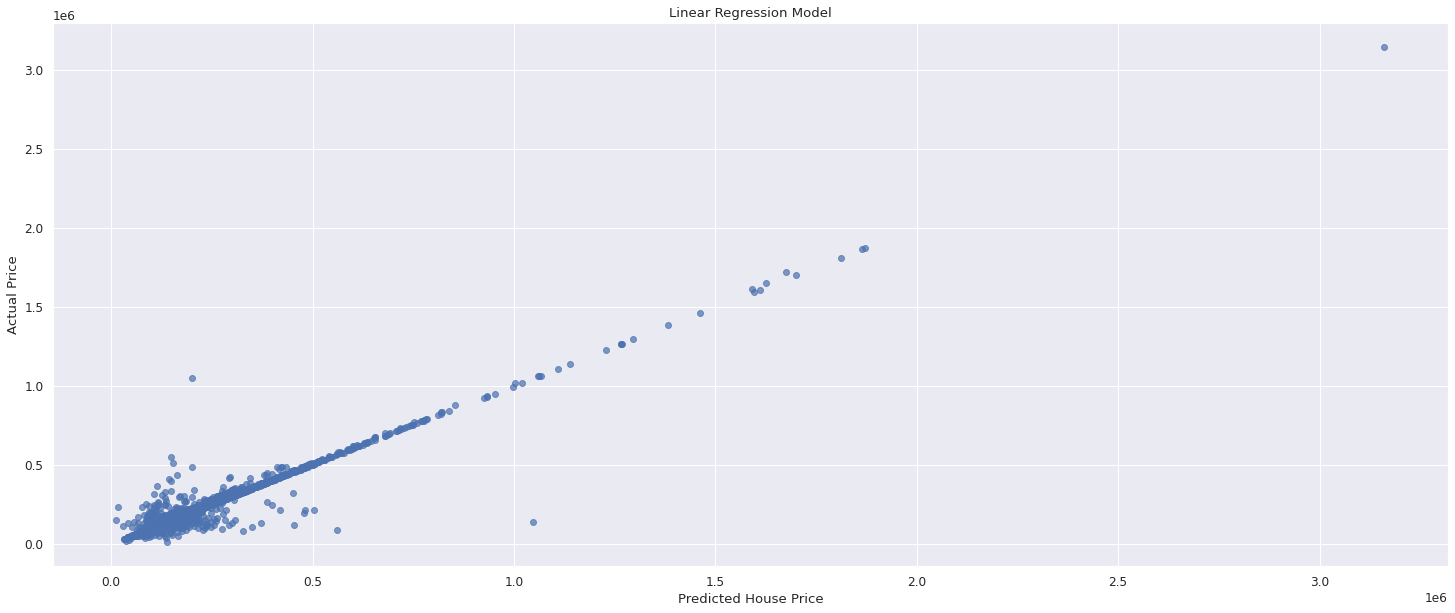

In [234]:
actual_values = y_test
plt.figure(figsize=(25,10))
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted House Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

## Simple Random Imputation
we impute the missing data with random observed values of the variable) which is later followed by Regression Imputation of each of the variables iteratively.

In [235]:
number_missing = dataset[0]['House Price'].isnull().sum()
number_missing

5140

In [236]:
observed_values = dataset[0].loc[dataset[0]['House Price'].notnull(), ['House Price']]
observed_values

,House Price
0,439134.274215
1,103235.979015
2,398515.957515
3,231849.048015
6,133550.924715
...,...
19995,181411.869015
19996,124193.568915
19997,189604.431315
19998,384516.228915


In [237]:
jcols

['House Price',
 'Income',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings']

In [238]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [239]:
for feature in jcols:
    dataset[0][feature + '_imp'] = dataset[0][feature]
    dataset[0] = random_imputation(dataset[0], feature)

### Deterministic Regression Imputation
In Deterministic Regression Imputation, we replace the missing data with the values predicted in our regression model and repeat this process for each variable.

In [240]:
jcols

['House Price',
 'Income',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings']

In [241]:
# Select numerical features
num_features_0 = dataset[0].select_dtypes(include=[np.number])
num_features_0.dtypes

Obs                          int64
Sales                        int64
Email                        int64
Tenure                       int64
NumberofCampaigns            int64
ProdActive                   int64
ProdBought                   int64
Premium Offered            float64
Birthdate                  float64
Living Area (m^2)          float64
House Price                float64
Income                     float64
yearBuilt                  float64
House Insurance            float64
Pension Plan               float64
Credit                     float64
Savings                    float64
Number of Mobile Phones    float64
Number of Fixed Lines      float64
ADSL                       float64
3G Devices                 float64
House Price_imp            float64
Income_imp                 float64
House Insurance_imp        float64
Pension Plan_imp           float64
Credit_imp                 float64
Savings_imp                float64
dtype: object

In [242]:
num_features_0 = num_features_0.drop(['Obs'], axis=1)
num_features_0

,Sales,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Birthdate,Living Area (m^2),House Price,...,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,House Price_imp,Income_imp,House Insurance_imp,Pension Plan_imp,Credit_imp,Savings_imp
0,0,0,2012,2,0,0,11.12,1944.0,68.28964,439134.274215,...,3.0,2.0,0.0,1.0,439134.274215,55407.736314,15345.3798,76897.09528,35147.05566,0.000
1,1,0,2011,2,0,1,11.12,1961.0,85.60244,103235.979015,...,1.0,2.0,1.0,1.0,103235.979015,27854.157114,3485.5758,18037.38088,8133.08226,0.000
2,0,0,1992,2,0,0,14.50,1950.0,170.12964,398515.957515,...,3.0,2.0,1.0,0.0,398515.957515,108942.578514,13911.2298,69779.49768,31880.39706,98010.783
3,0,0,2011,2,0,0,14.50,1962.0,158.64584,231849.048015,...,3.0,2.0,0.0,0.0,231849.048015,63173.280114,8026.6158,40574.30488,18476.52126,0.000
4,0,0,1992,2,0,0,14.50,1969.0,58.18604,NaN,...,1.0,0.0,0.0,0.0,177172.608015,24027.612714,8236.8738,20002.41048,14105.39646,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,2013,2,0,0,14.50,1968.0,95.37104,181411.869015,...,1.0,2.0,0.0,0.0,181411.869015,49322.465514,5225.8878,31736.20088,14420.22726,44352.684
19996,0,0,2013,2,0,0,14.50,1983.0,96.42964,124193.568915,...,2.0,0.0,0.0,0.0,124193.568915,33609.433914,2453.1678,21709.78488,9818.55126,0.000
19997,0,0,2009,4,0,1,14.50,1965.0,1009.63964,189604.431315,...,3.0,0.0,1.0,1.0,189604.431315,51572.258514,6535.0458,33171.76968,15079.08906,46377.495
19998,0,0,2012,4,0,0,14.50,1983.0,414.67964,384516.228915,...,1.0,1.0,1.0,0.0,384516.228915,105098.041314,13416.9318,67326.33288,30754.50426,94550.706


In [243]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in jcols])

for feature in jcols:
        
    deter_data["Det" + feature] = num_features_0[feature + "_imp"]
    parameters = list(set(num_features_0.columns) - set(jcols) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = num_features_0[parameters], y = num_features_0[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[num_features_0[feature].isnull(), "Det" + feature] = model.predict(num_features_0[parameters])[num_features_0[feature].isnull()]

### Stochastic Regression Imputation
To add uncertainity back to the imputed variable values, we can add some normally distributed noise with a mean of zero and the variance equal to the standard error of regression estimates . This method is called as Random Imputation or Stochastic Regression Imputation

In [244]:
random_data = pd.DataFrame(columns = ["Ran" + name for name in jcols])

for feature in jcols:
        
    random_data["Ran" + feature] = num_features_0[feature + '_imp']
    parameters = list(set(num_features_0.columns) - set(jcols) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = num_features_0[parameters], y = num_features_0[feature + '_imp'])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(num_features_0[parameters])
    std_error = (predict[num_features_0[feature].notnull()] - num_features_0.loc[num_features_0[feature].notnull(), feature + '_imp']).std()
    
    #observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size = num_features_0[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_data.loc[(num_features_0[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(num_features_0[feature].isnull()) & 
                                                                            (random_predict > 0)]

In [245]:
dataset[0]

,Obs,Sales,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Phone Call Day,...,Number of Fixed Lines,ADSL,3G Devices,Type of House,House Price_imp,Income_imp,House Insurance_imp,Pension Plan_imp,Credit_imp,Savings_imp
0,1,0,FIXED / LAND PHONE,0,2012,2,0,0,11.12,Wednesday,...,2.0,0.0,1.0,Urban,439134.274215,55407.736314,15345.3798,76897.09528,35147.05566,0.000
1,2,1,MOBILE PHONE,0,2011,2,0,1,11.12,Thrusday,...,2.0,1.0,1.0,Rustic,103235.979015,27854.157114,3485.5758,18037.38088,8133.08226,0.000
2,3,0,FIXED / LAND PHONE,0,1992,2,0,0,14.50,Thrusday,...,2.0,1.0,0.0,Urban,398515.957515,108942.578514,13911.2298,69779.49768,31880.39706,98010.783
3,4,0,MOBILE PHONE,0,2011,2,0,0,14.50,Wednesday,...,2.0,0.0,0.0,Urban,231849.048015,63173.280114,8026.6158,40574.30488,18476.52126,0.000
4,5,0,MOBILE PHONE,0,1992,2,0,0,14.50,Wednesday,...,0.0,0.0,0.0,Urban,177172.608015,24027.612714,8236.8738,20002.41048,14105.39646,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,FIXED / LAND PHONE,0,2013,2,0,0,14.50,Thrusday,...,2.0,0.0,0.0,Rustic,181411.869015,49322.465514,5225.8878,31736.20088,14420.22726,44352.684
19996,19997,0,FIXED / LAND PHONE,0,2013,2,0,0,14.50,Friday,...,0.0,0.0,0.0,Urban,124193.568915,33609.433914,2453.1678,21709.78488,9818.55126,0.000
19997,19998,0,FIXED / LAND PHONE,0,2009,4,0,1,14.50,Monday,...,0.0,1.0,1.0,Urban,189604.431315,51572.258514,6535.0458,33171.76968,15079.08906,46377.495
19998,19999,0,FIXED / LAND PHONE,0,2012,4,0,0,14.50,Monday,...,1.0,1.0,0.0,Urban,384516.228915,105098.041314,13416.9318,67326.33288,30754.50426,94550.706


In [246]:
dataset[1]

,Obs,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Birthdate,Socieconomic Status,Province,...,Pension Plan,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House
0,1,FIXED / LAND PHONE,0,2011,4,0,0,1962.0,High,OU,...,40289.464296,One,Low,18386.272962,56033.07732,2.0,1.0,1.0,0.0,Urban
1,2,FIXED / LAND PHONE,0,2012,2,0,0,1981.0,Medium,VA,...,13824.893096,None,Low,6240.219762,0.00000,0.0,0.0,1.0,0.0,Urban
2,3,FIXED / LAND PHONE,0,2011,6,0,1,1967.0,Low,BU,...,74436.255496,two,Low,34058.121162,66860.13132,0.0,0.0,0.0,0.0,Urban
3,4,FIXED / LAND PHONE,0,2012,2,0,0,1976.0,Low,VA,...,66466.846696,two,Low,30400.519362,428621.27832,0.0,1.0,0.0,0.0,Urban
4,5,MOBILE PHONE,0,2013,2,0,0,1949.0,Medium,GR,...,NaN,None,Low,NaN,NaN,0.0,2.0,0.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,MOBILE PHONE,0,2012,2,0,0,1947.0,Medium,GR,...,33368.793096,None,Low,15209.994762,46271.82132,1.0,1.0,1.0,0.0,Urban
9996,9997,FIXED / LAND PHONE,0,2012,4,0,0,1966.0,Low,VA,...,22729.300296,None,Low,10326.943962,0.00000,2.0,0.0,0.0,0.0,Rustic
9997,9998,MOBILE PHONE,0,2012,2,0,0,1964.0,Medium,ZA,...,NaN,None,Low,NaN,NaN,0.0,0.0,0.0,0.0,Urban
9998,9999,MOBILE PHONE,0,2012,2,0,0,1972.0,Low,BA,...,14379.438696,None,Low,6494.731362,51849.99432,2.0,0.0,0.0,1.0,Urban


In [247]:
num_features_0

,Sales,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Birthdate,Living Area (m^2),House Price,...,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,House Price_imp,Income_imp,House Insurance_imp,Pension Plan_imp,Credit_imp,Savings_imp
0,0,0,2012,2,0,0,11.12,1944.0,68.28964,439134.274215,...,3.0,2.0,0.0,1.0,439134.274215,55407.736314,15345.3798,76897.09528,35147.05566,0.000
1,1,0,2011,2,0,1,11.12,1961.0,85.60244,103235.979015,...,1.0,2.0,1.0,1.0,103235.979015,27854.157114,3485.5758,18037.38088,8133.08226,0.000
2,0,0,1992,2,0,0,14.50,1950.0,170.12964,398515.957515,...,3.0,2.0,1.0,0.0,398515.957515,108942.578514,13911.2298,69779.49768,31880.39706,98010.783
3,0,0,2011,2,0,0,14.50,1962.0,158.64584,231849.048015,...,3.0,2.0,0.0,0.0,231849.048015,63173.280114,8026.6158,40574.30488,18476.52126,0.000
4,0,0,1992,2,0,0,14.50,1969.0,58.18604,NaN,...,1.0,0.0,0.0,0.0,177172.608015,24027.612714,8236.8738,20002.41048,14105.39646,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,2013,2,0,0,14.50,1968.0,95.37104,181411.869015,...,1.0,2.0,0.0,0.0,181411.869015,49322.465514,5225.8878,31736.20088,14420.22726,44352.684
19996,0,0,2013,2,0,0,14.50,1983.0,96.42964,124193.568915,...,2.0,0.0,0.0,0.0,124193.568915,33609.433914,2453.1678,21709.78488,9818.55126,0.000
19997,0,0,2009,4,0,1,14.50,1965.0,1009.63964,189604.431315,...,3.0,0.0,1.0,1.0,189604.431315,51572.258514,6535.0458,33171.76968,15079.08906,46377.495
19998,0,0,2012,4,0,0,14.50,1983.0,414.67964,384516.228915,...,1.0,1.0,1.0,0.0,384516.228915,105098.041314,13416.9318,67326.33288,30754.50426,94550.706


In [248]:
# Select numerical features
num_features_1 = dataset[1].select_dtypes(include=[np.number])
num_features_1.dtypes

Obs                          int64
Email                        int64
Tenure                       int64
NumberofCampaigns            int64
ProdActive                   int64
ProdBought                   int64
Birthdate                  float64
Living Area (m^2)          float64
House Price                float64
Income                     float64
yearBuilt                  float64
House Insurance            float64
Pension Plan               float64
Credit                     float64
Savings                    float64
Number of Mobile Phones    float64
Number of Fixed Lines      float64
ADSL                       float64
3G Devices                 float64
dtype: object

In [249]:
num_features_1

,Obs,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Birthdate,Living Area (m^2),House Price,Income,yearBuilt,House Insurance,Pension Plan,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices
0,1,0,2011,4,0,0,1962.0,60.4474,230139.624195,62842.06971,1961.0,8010.6894,40289.464296,18386.272962,56033.07732,2.0,1.0,1.0,0.0
1,2,0,2012,2,0,0,1981.0,78.0148,119859.179895,21367.73331,1955.0,2678.2794,13824.893096,6240.219762,0.00000,0.0,0.0,1.0,0.0
2,3,0,2011,6,0,1,1967.0,395.0320,425006.996895,116355.65571,2001.0,14891.0094,74436.255496,34058.121162,66860.13132,0.0,0.0,0.0,0.0
3,4,0,2012,2,0,0,1976.0,514.2920,379527.587595,103866.30891,1980.0,13285.2294,66466.846696,30400.519362,428621.27832,0.0,1.0,0.0,0.0
4,5,0,2013,2,0,0,1949.0,163.3862,NaN,NaN,1968.0,NaN,NaN,NaN,NaN,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0,2012,2,0,0,1947.0,102.9656,190645.033995,51996.25431,1976.0,6616.2294,33368.793096,15209.994762,46271.82132,1.0,1.0,1.0,0.0
9996,9997,0,2012,4,0,0,1966.0,108.3658,129927.848895,35322.38451,1995.0,4472.4474,22729.300296,10326.943962,0.00000,2.0,0.0,0.0,0.0
9997,9998,0,2012,2,0,0,1964.0,127.0320,NaN,NaN,1960.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
9998,9999,0,2012,2,0,0,1972.0,529.0320,82277.223795,22236.78051,1931.0,2790.0054,14379.438696,6494.731362,51849.99432,2.0,0.0,0.0,1.0


In [250]:
for feature in jcols:
    dataset[1][feature + '_imp'] = dataset[1][feature]
    dataset[1] = random_imputation(dataset[1], feature)

In [251]:
dataset[1]

,Obs,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Birthdate,Socieconomic Status,Province,...,Number of Fixed Lines,ADSL,3G Devices,Type of House,House Price_imp,Income_imp,House Insurance_imp,Pension Plan_imp,Credit_imp,Savings_imp
0,1,FIXED / LAND PHONE,0,2011,4,0,0,1962.0,High,OU,...,1.0,1.0,0.0,Urban,230139.624195,62842.06971,8010.6894,40289.464296,18386.272962,56033.07732
1,2,FIXED / LAND PHONE,0,2012,2,0,0,1981.0,Medium,VA,...,0.0,1.0,0.0,Urban,119859.179895,21367.73331,2678.2794,13824.893096,6240.219762,0.00000
2,3,FIXED / LAND PHONE,0,2011,6,0,1,1967.0,Low,BU,...,0.0,0.0,0.0,Urban,425006.996895,116355.65571,14891.0094,74436.255496,34058.121162,66860.13132
3,4,FIXED / LAND PHONE,0,2012,2,0,0,1976.0,Low,VA,...,1.0,0.0,0.0,Urban,379527.587595,103866.30891,13285.2294,66466.846696,30400.519362,428621.27832
4,5,MOBILE PHONE,0,2013,2,0,0,1949.0,Medium,GR,...,2.0,0.0,1.0,Urban,275309.837595,55578.71151,1961.6814,31076.910696,8151.442962,44007.49332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,MOBILE PHONE,0,2012,2,0,0,1947.0,Medium,GR,...,1.0,1.0,0.0,Urban,190645.033995,51996.25431,6616.2294,33368.793096,15209.994762,46271.82132
9996,9997,FIXED / LAND PHONE,0,2012,4,0,0,1966.0,Low,VA,...,0.0,0.0,0.0,Rustic,129927.848895,35322.38451,4472.4474,22729.300296,10326.943962,0.00000
9997,9998,MOBILE PHONE,0,2012,2,0,0,1964.0,Medium,ZA,...,0.0,0.0,0.0,Urban,260698.760595,35517.10491,3735.2574,17681.627496,8093.091762,0.00000
9998,9999,MOBILE PHONE,0,2012,2,0,0,1972.0,Low,BA,...,0.0,0.0,1.0,Urban,82277.223795,22236.78051,2790.0054,14379.438696,6494.731362,51849.99432


In [252]:
num_features_1.columns

Index(['Obs', 'Email', 'Tenure', 'NumberofCampaigns', 'ProdActive',
       'ProdBought', 'Birthdate', 'Living Area (m^2)', 'House Price', 'Income',
       'yearBuilt', 'House Insurance', 'Pension Plan', 'Credit', 'Savings',
       'Number of Mobile Phones', 'Number of Fixed Lines', 'ADSL',
       '3G Devices'],
      dtype='object')

### 5.2 Normalize, Standarize, Scale

Many machine learning algorithms work better when features are on a relatively similar scale and close to normally distributed. **MinMaxScaler, RobustScaler, StandardScaler, and Normalizer** are scikit-learn library methods to preprocess data for machine learning. 

Which method you need, if any, depends on your model type and your feature values.
This guide will highlight the differences and similarities among these methods and help you learn when to reach for which tool.

As often as these methods appear in machine learning workflows, I found it difficult to find information about which of them to use when. Commentators often use the terms scale, standardize, and normalize interchangeably. However, their are some differences and the four scikit-learn functions we will examine do different things.

### What do These Terms Mean?
Scale generally means to change the range of the values. The shape of the distribution doesn’t change. Think about how a scale model of a building has the same proportions as the original, just smaller. That’s why we say it is drawn to scale. The range is often set at 0 to 1.

Standardize generally means changing the values so that the distribution standard deviation from the mean equals one. It outputs something very close to a normal distribution. Scaling is often implied.
Normalize can be used to mean either of the above things (and more!). I suggest you avoid the term normalize, because it has many definitions and is prone to creating confusion.

If you use any of these terms in your communication, I strongly suggest you define them.

### Why Scale, Standardize, or Normalize?
Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed. Examples of such algorithm families include:
linear and logistic regression
nearest neighbors
neural networks
support vector machines with radial bias kernel functions
principal components analysis
linear discriminant analysis
Scaling and standardizing can help features arrive in more digestible form for these algorithms.
The four scikit-learn preprocessing methods we are examining follow the API shown below. X_train and X_test are the usual numpy ndarrays or pandas DataFrames.

## Scaling with StandardScaler

We made scaling by StandarScaler and evaluate results to first approach.

### Impute `Income` feature

In [256]:
col_Z = ['Living Area (m^2)','House Price', 'Income',
                                       'House Insurance',
                                       'Pension Plan','Credit',
                                       'Savings',
        ]

In [258]:
features = df_notnans[col_Z]
#scaler = StandardScaler().fit(features.values)
#features = scaler.transform(features.values)

In [259]:
df_notnans[col_Z] = features
df_notnans.head(10)

,Obs,Sales,PhoneType,Email,Tenure,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Phone Call Day,...,Pension Plan,Estimated number of cars,Probability of Second Residence,Credit,Savings,Number of Mobile Phones,Number of Fixed Lines,ADSL,3G Devices,Type of House
0,1,0,FIXED / LAND PHONE,0,2012,2,0,0,11.12,Wednesday,...,76897.09528,two,Low,35147.05566,0.000,3.0,2.0,0.0,1.0,Urban
1,2,1,MOBILE PHONE,0,2011,2,0,1,11.12,Thrusday,...,18037.38088,None,Low,8133.08226,0.000,1.0,2.0,1.0,1.0,Rustic
2,3,0,FIXED / LAND PHONE,0,1992,2,0,0,14.50,Thrusday,...,69779.49768,two,Low,31880.39706,98010.783,3.0,2.0,1.0,0.0,Urban
3,4,0,MOBILE PHONE,0,2011,2,0,0,14.50,Wednesday,...,40574.30488,One,Low,18476.52126,0.000,3.0,2.0,0.0,0.0,Urban
6,7,0,FIXED / LAND PHONE,0,2012,2,0,0,11.12,Tuesday,...,23349.46248,None,Low,10571.08986,0.000,2.0,2.0,1.0,1.0,Rustic
9,10,0,MOBILE PHONE,0,2009,2,0,0,14.50,Sunday,...,25992.37128,None,Low,11784.06666,0.000,1.0,0.0,1.0,0.0,Urban
11,12,0,FIXED / LAND PHONE,0,2013,2,0,0,14.50,Wednesday,...,36551.46408,One,Low,16630.21746,51144.372,3.0,0.0,0.0,0.0,Rustic
13,14,0,FIXED / LAND PHONE,0,1994,2,0,0,11.12,Monday,...,25871.02088,None,Low,11728.37226,0.000,0.0,1.0,1.0,0.0,Urban
14,15,0,MOBILE PHONE,0,2013,2,0,0,14.50,Monday,...,29528.25608,None,Low,13406.87946,0.000,0.0,2.0,1.0,1.0,Urban
15,16,0,MOBILE PHONE,0,2010,4,0,0,14.50,Wednesday,...,38698.46568,One,Low,17615.59506,54172.638,2.0,2.0,0.0,0.0,Urban


In [273]:
# Keep only 15 high correlated variables with the predicted feature
icols = corrmat.nlargest(k, 'Income')['Income'].index
icols

Index(['Income', 'House Insurance', 'Credit', 'Pension Plan', 'House Price',
       'Savings', 'Living Area (m^2)', 'Birthdate', 'Number of Fixed Lines',
       '3G Devices', 'Email', 'Number of Mobile Phones', 'ProdActive',
       'Tenure', 'Obs'],
      dtype='object')

In [274]:
icols = icols.drop('Income')
icols

Index(['House Insurance', 'Credit', 'Pension Plan', 'House Price', 'Savings',
       'Living Area (m^2)', 'Birthdate', 'Number of Fixed Lines', '3G Devices',
       'Email', 'Number of Mobile Phones', 'ProdActive', 'Tenure', 'Obs'],
      dtype='object')

In [275]:
jcols

['House Price',
 'Income',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings']

In [276]:
df_notnans[jcols]['Income']

0         55407.736314
1         27854.157114
2        108942.578514
3         63173.280114
6         36179.103114
             ...      
19995     49322.465514
19996     33609.433914
19997     51572.258514
19998    105098.041314
19999     38290.674114
Name: Income, Length: 14845, dtype: float64

In [277]:
# Split into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(df_notnans[icols], df_notnans[jcols]['Income'],
                                                    train_size=0.75,
                                                    random_state=42)

In [278]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11133, 14), (3712, 14), (11133,), (3712,))

In [279]:
X_train, X_test

(       House Insurance       Credit  Pension Plan    House Price    Savings  \
 10986        4267.2078  11768.24886   25957.90648  148436.507115      0.000   
 7721         4456.5138  10344.62226   22856.02088  130734.933615      0.000   
 16836        5896.5318  13624.66326   30002.77688  118923.069915      0.000   
 4118         4613.4738  10702.13406   23634.98968  135180.442215      0.000   
 16082        6426.0378  14830.77666   19074.48728  186516.836415  45614.394   
 ...                ...          ...           ...            ...        ...   
 7025         7633.1718  17580.34326   38621.65688  220705.617015  30128.409   
 18090        1117.2258   2738.49906    6283.32968   36158.545215      0.000   
 7294         5390.9838  12473.13726   27493.76088   80933.684715      0.000   
 1172         7964.9478  18336.07986   40268.30248  230102.530515  56386.746   
 9793         7724.0178  17787.27846   39072.54008  223278.704415  18387.621   
 
        Living Area (m^2)  Birthdate  

In [280]:
# Build de model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [281]:
# Check the prediction score
score = model.score(X_test, y_test)
print("The prediction score of Income feature or R^2 on the test data is {:.2f}%".format(score*100))
#print ("R^2 is: \n", model.score(X_test, y_test))

The prediction score of Income feature or R^2 on the test data is 95.03%


In [282]:
predictions = model.predict(X_test)

In [283]:
predictions

array([88831.68376539, 64863.76534018, 55980.21973358, ...,
       62753.06432311, 59170.74902595, 63869.54220221])

In [284]:
# Save prediction on dataset
random_data.loc[(num_features_0[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(num_features_0[feature].isnull()) & (random_predict > 0)]

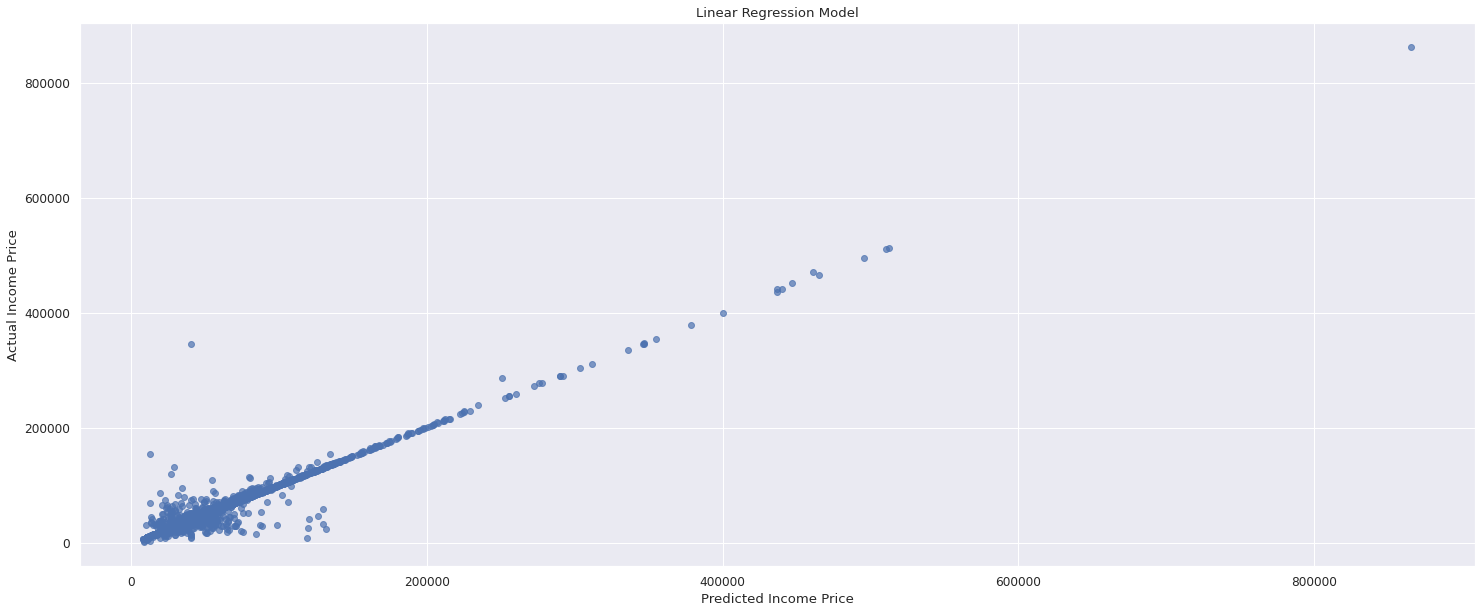

In [285]:
actual_values = y_test
plt.figure(figsize=(25,10))
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Income Price')
plt.ylabel('Actual Income Price')
plt.title('Linear Regression Model')
plt.show()

### Impute `House Insurance` feature

In [286]:
# Keep only 15 high correlated variables with the predicted feature
icols = corrmat.nlargest(k, 'House Insurance')['House Insurance'].index
icols

Index(['House Insurance', 'Credit', 'Pension Plan', 'House Price', 'Income',
       'Savings', 'Living Area (m^2)', 'Birthdate', 'Number of Fixed Lines',
       '3G Devices', 'Email', 'Tenure', 'Number of Mobile Phones',
       'ProdActive', 'Obs'],
      dtype='object')

In [287]:
icols = icols.drop('House Insurance')
icols

Index(['Credit', 'Pension Plan', 'House Price', 'Income', 'Savings',
       'Living Area (m^2)', 'Birthdate', 'Number of Fixed Lines', '3G Devices',
       'Email', 'Tenure', 'Number of Mobile Phones', 'ProdActive', 'Obs'],
      dtype='object')

In [288]:
jcols

['House Price',
 'Income',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings']

In [289]:
df_notnans[jcols]['House Insurance']

0        15345.3798
1         3485.5758
2        13911.2298
3         8026.6158
6         4555.9278
            ...    
19995     5225.8878
19996     2453.1678
19997     6535.0458
19998    13416.9318
19999     4827.4218
Name: House Insurance, Length: 14845, dtype: float64

In [290]:
# Split into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(df_notnans[icols], df_notnans[jcols]['House Insurance'],
                                                    train_size=0.75,
                                                    random_state=42)

In [291]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11133, 14), (3712, 14), (11133,), (3712,))

In [292]:
X_train, X_test

(            Credit  Pension Plan    House Price        Income    Savings  \
 10986  11768.24886   25957.90648  148436.507115  40266.921114      0.000   
 7721   10344.62226   22856.02088  130734.933615  35405.790714      0.000   
 16836  13624.66326   30002.77688  118923.069915  46605.968514      0.000   
 4118   10702.13406   23634.98968  135180.442215  36626.604714      0.000   
 16082  14830.77666   19074.48728  186516.836415  50724.366714  45614.394   
 ...            ...           ...            ...           ...        ...   
 7025   17580.34326   38621.65688  220705.617015  60113.130714  30128.409   
 18090   2738.49906    6283.32968   36158.545215   9433.662714      0.000   
 7294   12473.13726   27493.76088   80933.684715  42673.886514      0.000   
 1172   18336.07986   40268.30248  230102.530515  62693.661114  56386.746   
 9793   17787.27846   39072.54008  223278.704415  60819.738714  18387.621   
 
        Living Area (m^2)  Birthdate  Number of Fixed Lines  3G Devices  E

In [293]:
# Build de model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [294]:
# Check the prediction score
score = model.score(X_test, y_test)
print("The prediction score of House Insurance feature or R^2 on the test data is {:.2f}%".format(score*100))
#print ("R^2 is: \n", model.score(X_test, y_test))

The prediction score of House Insurance feature or R^2 on the test data is 98.15%


In [295]:
predictions = model.predict(X_test)

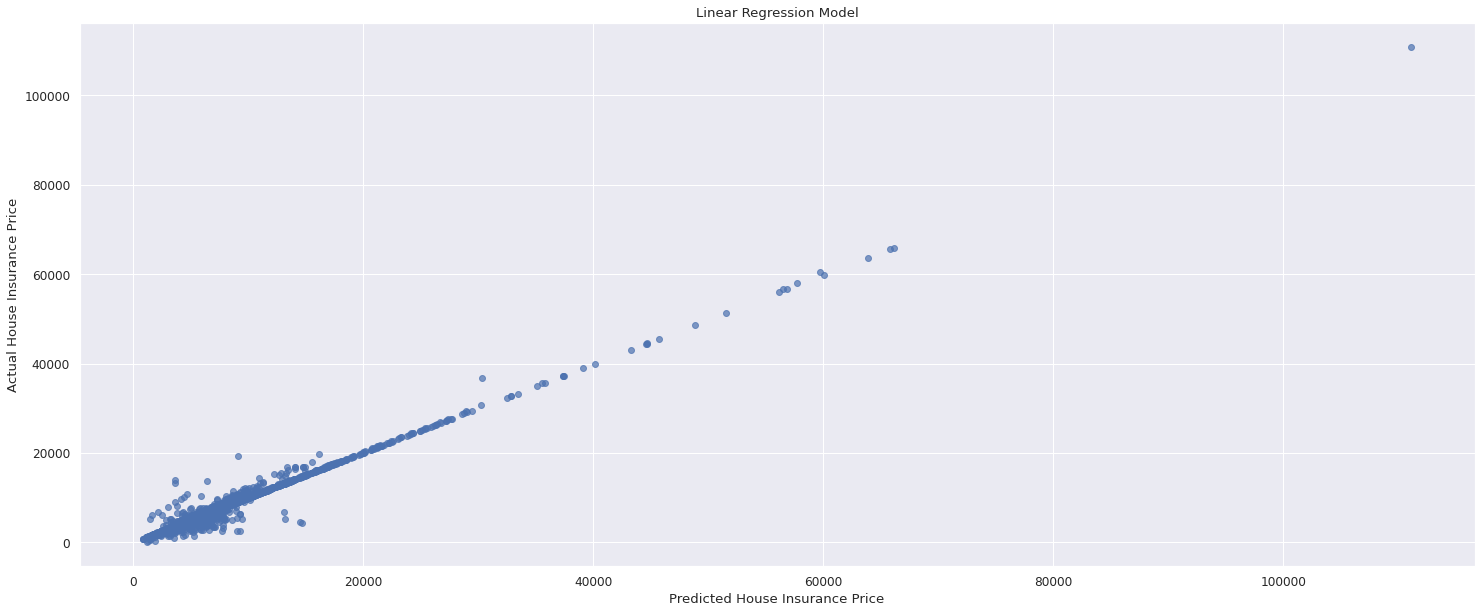

In [296]:
actual_values = y_test
plt.figure(figsize=(25,10))
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted House Insurance Price')
plt.ylabel('Actual House Insurance Price')
plt.title('Linear Regression Model')
plt.show()

### Impute `Credit` feature

In [297]:
# Keep only 15 high correlated variables with the predicted feature
icols = corrmat.nlargest(k, 'Credit')['Credit'].index
icols

Index(['Credit', 'House Insurance', 'Pension Plan', 'House Price', 'Income',
       'Savings', 'Living Area (m^2)', 'Birthdate', '3G Devices', 'Email',
       'Number of Fixed Lines', 'Number of Mobile Phones', 'Tenure',
       'ProdActive', 'Obs'],
      dtype='object')

In [298]:
icols = icols.drop('Credit')
icols

Index(['House Insurance', 'Pension Plan', 'House Price', 'Income', 'Savings',
       'Living Area (m^2)', 'Birthdate', '3G Devices', 'Email',
       'Number of Fixed Lines', 'Number of Mobile Phones', 'Tenure',
       'ProdActive', 'Obs'],
      dtype='object')

In [299]:
jcols

['House Price',
 'Income',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings']

In [300]:
df_notnans[jcols]['Credit']

0        35147.05566
1         8133.08226
2        31880.39706
3        18476.52126
6        10571.08986
            ...     
19995    14420.22726
19996     9818.55126
19997    15079.08906
19998    30754.50426
19999    11189.48466
Name: Credit, Length: 14845, dtype: float64

In [301]:
# Split into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(df_notnans[icols], df_notnans[jcols]['Credit'],
                                                    train_size=0.75,
                                                    random_state=42)

In [302]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11133, 14), (3712, 14), (11133,), (3712,))

In [303]:
X_train, X_test

(       House Insurance  Pension Plan    House Price        Income    Savings  \
 10986        4267.2078   25957.90648  148436.507115  40266.921114      0.000   
 7721         4456.5138   22856.02088  130734.933615  35405.790714      0.000   
 16836        5896.5318   30002.77688  118923.069915  46605.968514      0.000   
 4118         4613.4738   23634.98968  135180.442215  36626.604714      0.000   
 16082        6426.0378   19074.48728  186516.836415  50724.366714  45614.394   
 ...                ...           ...            ...           ...        ...   
 7025         7633.1718   38621.65688  220705.617015  60113.130714  30128.409   
 18090        1117.2258    6283.32968   36158.545215   9433.662714      0.000   
 7294         5390.9838   27493.76088   80933.684715  42673.886514      0.000   
 1172         7964.9478   40268.30248  230102.530515  62693.661114  56386.746   
 9793         7724.0178   39072.54008  223278.704415  60819.738714  18387.621   
 
        Living Area (m^2) 

In [304]:
# Build de model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [305]:
# Check the prediction score
score = model.score(X_test, y_test)
print("The prediction score of Credit feature or R^2 on the test data is {:.2f}%".format(score*100))
#print ("R^2 is: \n", model.score(X_test, y_test))

The prediction score of Credit feature or R^2 on the test data is 97.86%


In [306]:
predictions = model.predict(X_test)

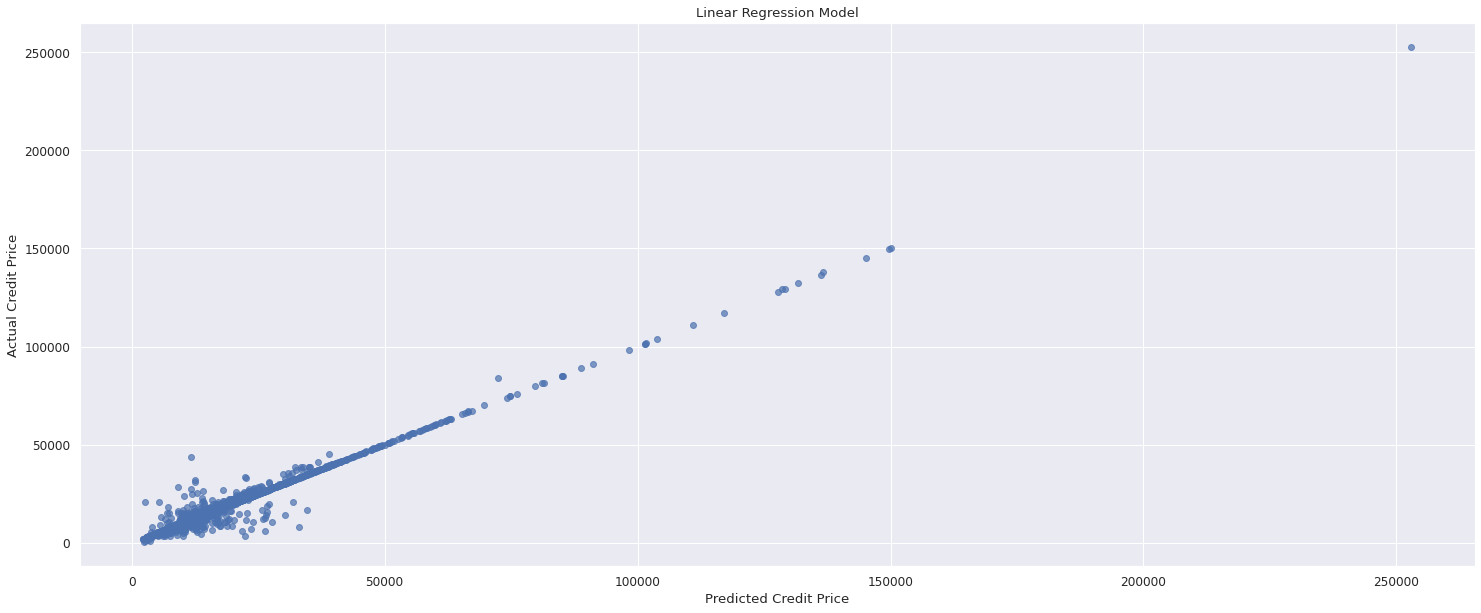

In [307]:
actual_values = y_test
plt.figure(figsize=(25,10))
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Credit Price')
plt.ylabel('Actual Credit Price')
plt.title('Linear Regression Model')
plt.show()

### Impute `Pension Plan` feature

In [ ]:
# Keep only 15 high correlated variables with the predicted feature
icols = corrmat.nlargest(k, 'Pension Plan')['Pension Plan'].index
icols

In [309]:
icols = icols.drop('Pension Plan')
icols

Index(['House Insurance', 'Credit', 'House Price', 'Income', 'Savings',
       'Living Area (m^2)', 'Birthdate', '3G Devices', 'Number of Fixed Lines',
       'Email', 'Number of Mobile Phones', 'Tenure', 'ProdActive', 'Obs'],
      dtype='object')

In [310]:
jcols

['House Price',
 'Income',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings']

In [311]:
df_notnans[jcols]['Pension Plan']

0        76897.09528
1        18037.38088
2        69779.49768
3        40574.30488
6        23349.46248
            ...     
19995    31736.20088
19996    21709.78488
19997    33171.76968
19998    67326.33288
19999    24696.85928
Name: Pension Plan, Length: 14845, dtype: float64

In [312]:
# Split into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(df_notnans[icols], df_notnans[jcols]['Pension Plan'],
                                                    train_size=0.75,
                                                    random_state=42)

In [313]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11133, 14), (3712, 14), (11133,), (3712,))

In [314]:
X_train, X_test

(       House Insurance       Credit    House Price        Income    Savings  \
 10986        4267.2078  11768.24886  148436.507115  40266.921114      0.000   
 7721         4456.5138  10344.62226  130734.933615  35405.790714      0.000   
 16836        5896.5318  13624.66326  118923.069915  46605.968514      0.000   
 4118         4613.4738  10702.13406  135180.442215  36626.604714      0.000   
 16082        6426.0378  14830.77666  186516.836415  50724.366714  45614.394   
 ...                ...          ...            ...           ...        ...   
 7025         7633.1718  17580.34326  220705.617015  60113.130714  30128.409   
 18090        1117.2258   2738.49906   36158.545215   9433.662714      0.000   
 7294         5390.9838  12473.13726   80933.684715  42673.886514      0.000   
 1172         7964.9478  18336.07986  230102.530515  62693.661114  56386.746   
 9793         7724.0178  17787.27846  223278.704415  60819.738714  18387.621   
 
        Living Area (m^2)  Birthdate  

In [315]:
# Build de model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [316]:
# Check the prediction score
score = model.score(X_test, y_test)
print("The prediction score of Pension Plan feature or R^2 on the test data is {:.2f}%".format(score*100))
#print ("R^2 is: \n", model.score(X_test, y_test))

The prediction score of Pension Plan feature or R^2 on the test data is 96.30%


In [317]:
predictions = model.predict(X_test)

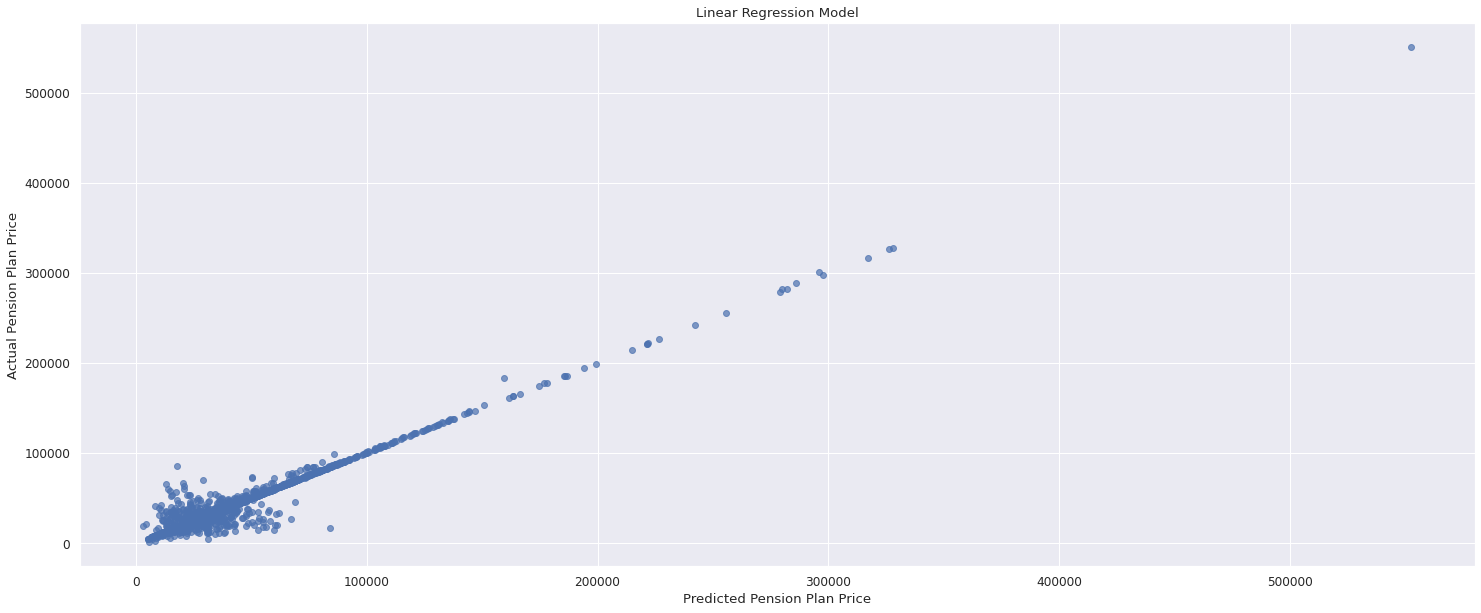

In [318]:
actual_values = y_test
plt.figure(figsize=(25,10))
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Pension Plan Price')
plt.ylabel('Actual Pension Plan Price')
plt.title('Linear Regression Model')
plt.show()

### Impute `House Price` feature

In [ ]:
# Keep only 15 high correlated variables with the predicted feature
icols = corrmat.nlargest(k, 'House Price')['House Price'].index
icols

In [320]:
icols = icols.drop('House Price')
icols

Index(['House Insurance', 'Credit', 'Pension Plan', 'Income', 'Savings',
       'Living Area (m^2)', 'Birthdate', 'Email', '3G Devices',
       'Number of Fixed Lines', 'ProdActive', 'Tenure',
       'Number of Mobile Phones', 'Obs'],
      dtype='object')

In [321]:
jcols

['House Price',
 'Income',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings']

In [322]:
df_notnans[jcols]['House Price']

0        439134.274215
1        103235.979015
2        398515.957515
3        231849.048015
6        133550.924715
             ...      
19995    181411.869015
19996    124193.568915
19997    189604.431315
19998    384516.228915
19999    153225.656415
Name: House Price, Length: 14845, dtype: float64

In [323]:
# Split into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(df_notnans[icols], df_notnans[jcols]['House Price'],
                                                    train_size=0.75,
                                                    random_state=42)

In [324]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11133, 14), (3712, 14), (11133,), (3712,))

In [325]:
X_train, X_test

(       House Insurance       Credit  Pension Plan        Income    Savings  \
 10986        4267.2078  11768.24886   25957.90648  40266.921114      0.000   
 7721         4456.5138  10344.62226   22856.02088  35405.790714      0.000   
 16836        5896.5318  13624.66326   30002.77688  46605.968514      0.000   
 4118         4613.4738  10702.13406   23634.98968  36626.604714      0.000   
 16082        6426.0378  14830.77666   19074.48728  50724.366714  45614.394   
 ...                ...          ...           ...           ...        ...   
 7025         7633.1718  17580.34326   38621.65688  60113.130714  30128.409   
 18090        1117.2258   2738.49906    6283.32968   9433.662714      0.000   
 7294         5390.9838  12473.13726   27493.76088  42673.886514      0.000   
 1172         7964.9478  18336.07986   40268.30248  62693.661114  56386.746   
 9793         7724.0178  17787.27846   39072.54008  60819.738714  18387.621   
 
        Living Area (m^2)  Birthdate  Email  3G De

In [326]:
# Build de model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [327]:
# Check the prediction score
score = model.score(X_test, y_test)
print("The prediction score of House Price feature or R^2 on the test data is {:.2f}%".format(score*100))
#print ("R^2 is: \n", model.score(X_test, y_test))

The prediction score of House Price feature or R^2 on the test data is 94.88%


In [328]:
predictions = model.predict(X_test)

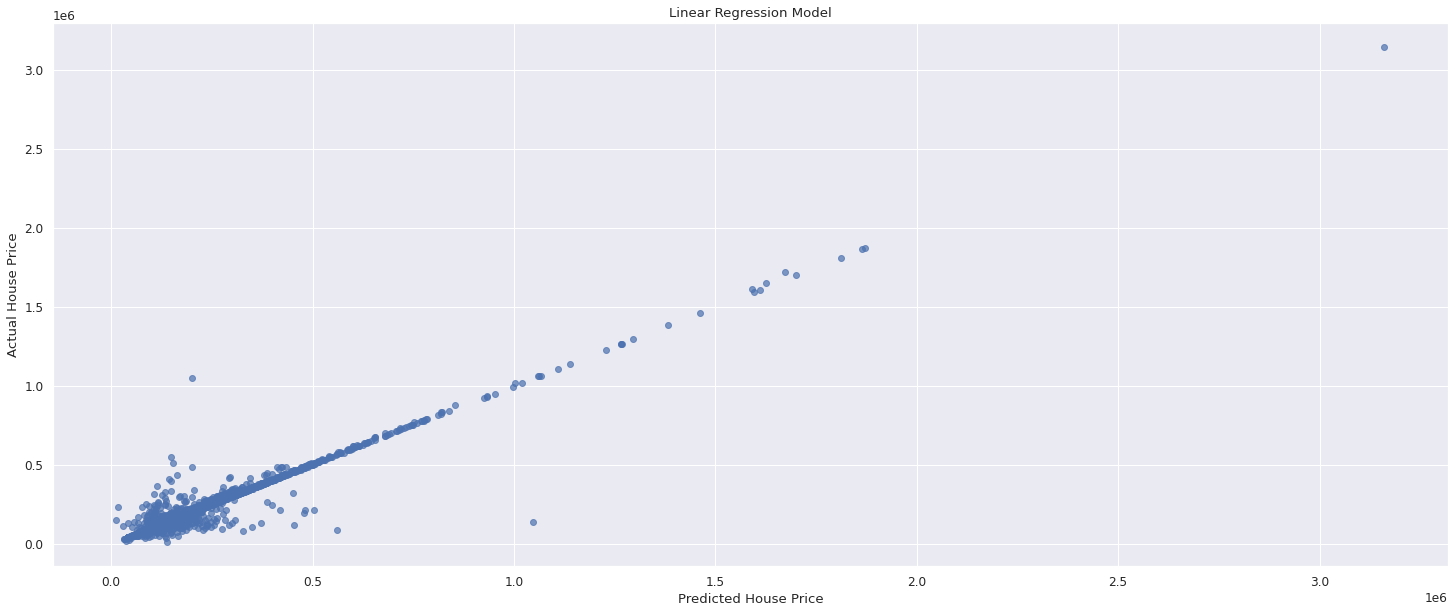

In [329]:
actual_values = y_test
plt.figure(figsize=(25,10))
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted House Price')
plt.ylabel('Actual House Price')
plt.title('Linear Regression Model')
plt.show()

### Impute `Savings` feature

In [330]:
# Keep only 15 high correlated variables with the predicted feature
icols = corrmat.nlargest(k, 'Savings')['Savings'].index
icols

Index(['Savings', 'House Insurance', 'Credit', 'Pension Plan', 'House Price',
       'Income', 'Living Area (m^2)', 'Birthdate', 'Number of Fixed Lines',
       'ProdActive', '3G Devices', 'Tenure', 'Email',
       'Number of Mobile Phones', 'Sales'],
      dtype='object')

In [331]:
icols = icols.drop('Savings')
icols

Index(['House Insurance', 'Credit', 'Pension Plan', 'House Price', 'Income',
       'Living Area (m^2)', 'Birthdate', 'Number of Fixed Lines', 'ProdActive',
       '3G Devices', 'Tenure', 'Email', 'Number of Mobile Phones', 'Sales'],
      dtype='object')

In [332]:
jcols

['House Price',
 'Income',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings']

In [333]:
df_notnans[jcols]['Savings']

0            0.000
1            0.000
2        98010.783
3            0.000
6            0.000
           ...    
19995    44352.684
19996        0.000
19997    46377.495
19998    94550.706
19999        0.000
Name: Savings, Length: 14845, dtype: float64

In [334]:
# Split into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(df_notnans[icols], df_notnans[jcols]['Savings'],
                                                    train_size=0.75,
                                                    random_state=42)

In [335]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11133, 14), (3712, 14), (11133,), (3712,))

In [336]:
X_train, X_test

(       House Insurance       Credit  Pension Plan    House Price  \
 10986        4267.2078  11768.24886   25957.90648  148436.507115   
 7721         4456.5138  10344.62226   22856.02088  130734.933615   
 16836        5896.5318  13624.66326   30002.77688  118923.069915   
 4118         4613.4738  10702.13406   23634.98968  135180.442215   
 16082        6426.0378  14830.77666   19074.48728  186516.836415   
 ...                ...          ...           ...            ...   
 7025         7633.1718  17580.34326   38621.65688  220705.617015   
 18090        1117.2258   2738.49906    6283.32968   36158.545215   
 7294         5390.9838  12473.13726   27493.76088   80933.684715   
 1172         7964.9478  18336.07986   40268.30248  230102.530515   
 9793         7724.0178  17787.27846   39072.54008  223278.704415   
 
              Income  Living Area (m^2)  Birthdate  Number of Fixed Lines  \
 10986  40266.921114           97.35424     1980.0                    0.0   
 7721   35405.79

In [337]:
# Build de model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [338]:
# Check the prediction score
score = model.score(X_test, y_test)
print("The prediction score of Savings feature or R^2 on the test data is {:.2f}%".format(score*100))
#print ("R^2 is: \n", model.score(X_test, y_test))

The prediction score of Savings feature or R^2 on the test data is 72.60%


In [339]:
predictions = model.predict(X_test)

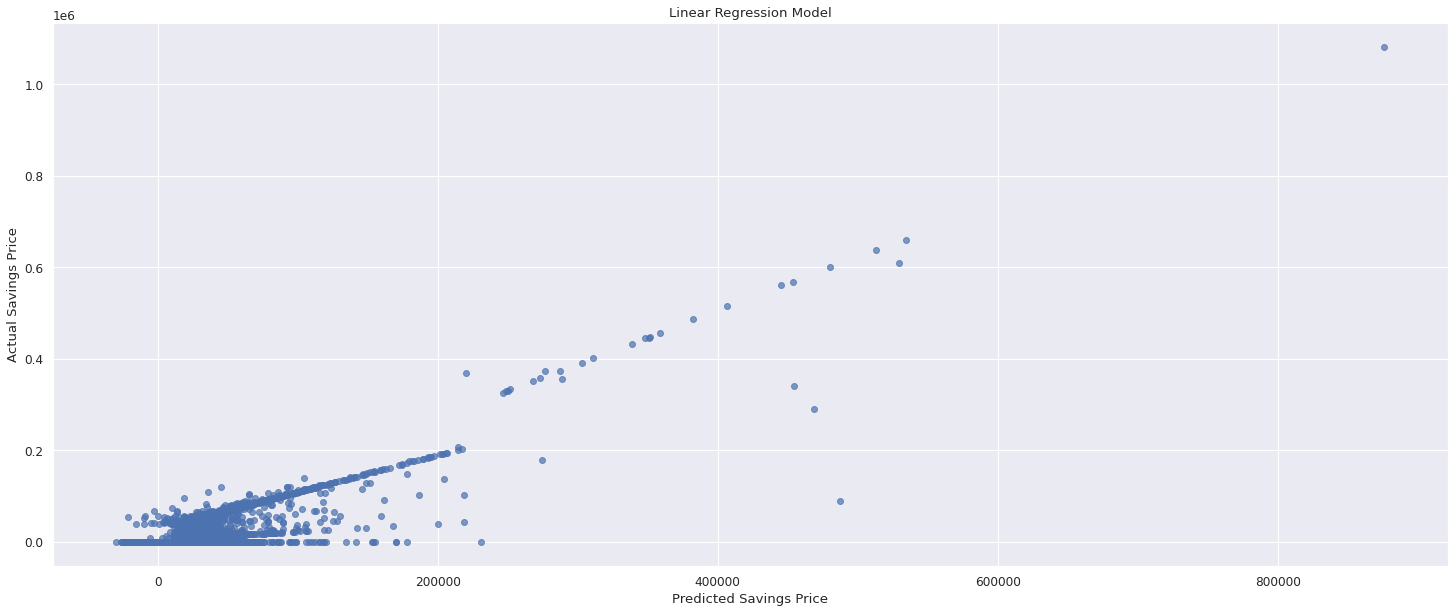

In [340]:
actual_values = y_test
plt.figure(figsize=(25,10))
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Savings Price')
plt.ylabel('Actual Savings Price')
plt.title('Linear Regression Model')
plt.show()


## Final thoughts about Feature engineering 2nd part

We impute categorical and numerical features by different approaches, mean, frequency or mode, linear regression and randomly. Again, we check if exist missing values and we'll start 3rd part with create new attributes or new features.

In [ ]:
# Check missing values for dataset0
missing_zero_values_table(dataset[0])

In [342]:
# Check missing values for dataset_1
missing_zero_values_table(dataset[1])

Your selected dataframe has 32 columns and 10000 Rows.
There are 6 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
House Price,0,2170,21.7,2170,21.7,float64
Income,0,2169,21.7,2169,21.7,float64
House Insurance,0,2169,21.7,2169,21.7,float64
Pension Plan,0,2169,21.7,2169,21.7,float64
Credit,0,2169,21.7,2169,21.7,float64
Savings,4071,2169,21.7,6240,62.4,float64


* * *
## Binarizing categorical variables

We binarize categorical variables before modeling stage, where `m` are binary variable.

## Save 2nd Wrangle and Cleanse data part

To be continued third part for numerical variables

In [343]:
# Save dataset0 and dataset1 for next step: Impute missing values for numerical variable.
dataset[0].to_csv('df2b_1.csv', index=False)
dataset[1].to_csv('df2b_2.csv', index=False)

* * *
### Estimated time to achieve 2b Wrangling and Cleansing data



The Third part has been achieved in `~5 hours`. We made investigation, analysis and transformation tasks.

To be continued with the 4th part,  `2c - Feature Engineering`...